# Machine translation services: Comparison of usage at target languages where available

**Megan Neisler, Senior Data Scientist, Wikimedia Foundation**

**Last Update: 27 May 2022**

[Ticket](https://phabricator.wikimedia.org/T303812) | [Codebase](https://github.com/wikimedia-research/machine-translation-service-analysis-2022)

# Table of Contents

1. [Purpose](#Purpose)
2. [Methodology](#Methodology)
3. [Overall usage by machine translation service](#Overall-usage-by-machine-translation-service)
4. [Daily published translations](#Daily-published-translations)
5. [Usage by language pair](#Usage-by-language-pair) 
6. [Usage at each target language](#Usage-at-each-target-language)
7. [Percent machine translation content is modified](#Percent-machine-translation-content-is-modified)
    

# Purpose
Content translation supports multiple machine translation services.  When multiple options are available for a language, even if one is provided by default, users can use a different service. 
[See default configuration](https://www.mediawiki.org/wiki/Help:Content_translation/Translating/Initial_machine_translation?useskin=vector-2022#Machine_translation_availability) and [languages supported](https://www.mediawiki.org/wiki/Help:Content_translation/Translating/Initial_machine_translation?useskin=vector-2022#Machine_translation_availability) files for details on all available language pairs and defaults. 

This analysis seeks to understand how the various available machine translation services are used at all the available target languages, which can be used to understand what languages each service is supporting the most and if any of the defaults need to be adjusted.

# Methodology

For each machine translation service, we compared the following:
* Percent of translations published by each machine translation service:
    * Overall across all languages
    * Daily usage trends
    * By Language Pair (Source - Target)
    * By Target Language
* Percent each machine translation service was modified by users

Data comes from the following sources:
* [cx_corpora table](https://www.mediawiki.org/wiki/Extension:ContentTranslation/cx_corpora_table?useskin=vector-2022)
* [cx_translations table](https://www.mediawiki.org/wiki/Extension:ContentTranslation/cx_translations_table?useskin=vector-2022)

We reviewed only published translations and translations started within the last 3 months (1 February 2022- 19 May 2022) as various machine translation service engines were available at different times and we're only interested in current usage. 

In [7]:
library(IRdisplay)

display_html(
'<script>  
code_show=true; 
function code_toggle() {
  if (code_show){
    $(\'div.input\').hide();
  } else {
    $(\'div.input\').show();
  }
  code_show = !code_show
}  
$( document ).ready(code_toggle);
</script>
  <form action="javascript:code_toggle()">
    <input type="submit" value="Click here to toggle on/off the raw code.">
 </form>'
)

In [6]:
# load required R packages
shhh <- function(expr) suppressPackageStartupMessages(suppressWarnings(suppressMessages(expr)))
shhh({
    library(tidyverse); library(lubridate); library(scales); library(gt)
})

In [2]:
# load data
mt_data <-
  read.csv(
    file = 'Data/mt_data.csv',
    header = TRUE,
    sep = ",",
    stringsAsFactors = FALSE
  ) # loads all cx data

In [3]:
#convert date back to integer

mt_data$translation_start_time <- format(mt_data$translation_start_time, scientific=F)

In [4]:
# convert time sent to date time
mt_data$translation_start_time <- as.Date(mt_data$translation_start_time, format = "%Y%m%d%H%M%S")

In [176]:
# only review published translations
# remove source and final rows
 #remove non mt service translations
mt_service_compare <- mt_data %>%
    filter(translation_status == 'published',
            translation_type == 'mt_engine',
          translation_start_time >= '2022-02-01') %>%
    mutate(language_pair = paste0(source_language, "-" ,target_language), # add language pair colum
          mt_service = factor(mt_service,
                             levels = c("Yandex", "LingoCloud", "Apertium", "Elia", "Flores", "OpusMT", "Google", "scratch"))) 


                 

# Percent of translations published

## Overall usage by machine translation service

We first reviewed overall usage of each machine translation service across all source and target languages. 

Note: Each translation service supports a different set of languages. Additionally, there are different default services provided for each language pair (i.e. the source and target language). Please see the [languages supported](https://www.mediawiki.org/wiki/Help:Content_translation/Translating/Initial_machine_translation?useskin=vector-2022#Machine_translation_availability) for details on supported langagues by MT service.  Each machine translation service's availability and default status at various language pairs impact the numbers reflected below.

In [177]:
# Overall look at translations by MT engine

mt_compare_overall <- mt_service_compare %>%
    group_by(mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = paste0(round(num_translations/sum(num_translations) * 100, 2), "%"))  %>%
    arrange(desc(pct_translations))


`summarise()` ungrouping output (override with `.groups` argument)



In [178]:
mt_compare_overall_tbl <- mt_compare_overall %>%
  gt() %>%
  tab_header(
    title = "Published translations by machine translations service \n across all language pairs",
      subtitle = "1 Feb 2022 through 19 May 2022"
  )  %>%
  cols_label(
    mt_service = "Machine translation service",
    num_translations = "Number of translations",
    pct_translations = "Percent of all published translations",
  ) %>%
  tab_footnote(
    footnote = "Translation started from scratch. No machine translation content was used.",
    locations = cells_body(
      columns = 'mt_service', rows = 2)) %>%
    gtsave(
    "mt_compare_overall_tbl.html", inline_css = TRUE)

IRdisplay::display_html(data = mt_compare_overall_tbl, file = "mt_compare_overall_tbl.html")

mt_compare_overall_tbl

1 Translation started from scratch. No machine translation content was used.


NULL

* Google translate, which can be used to translate into all available languages except English, has been used for the majority (81.1%) of published translations from 1 February 2022 through 19 May 2022.  
* Apertium, which is available at about 37 language pairs, is the second most frequently used MT service and has been used to publish 6.61% of all published translations.
* 6.88% of all published translations were started from scratch (no machine translation content was used).


## Daily published translations

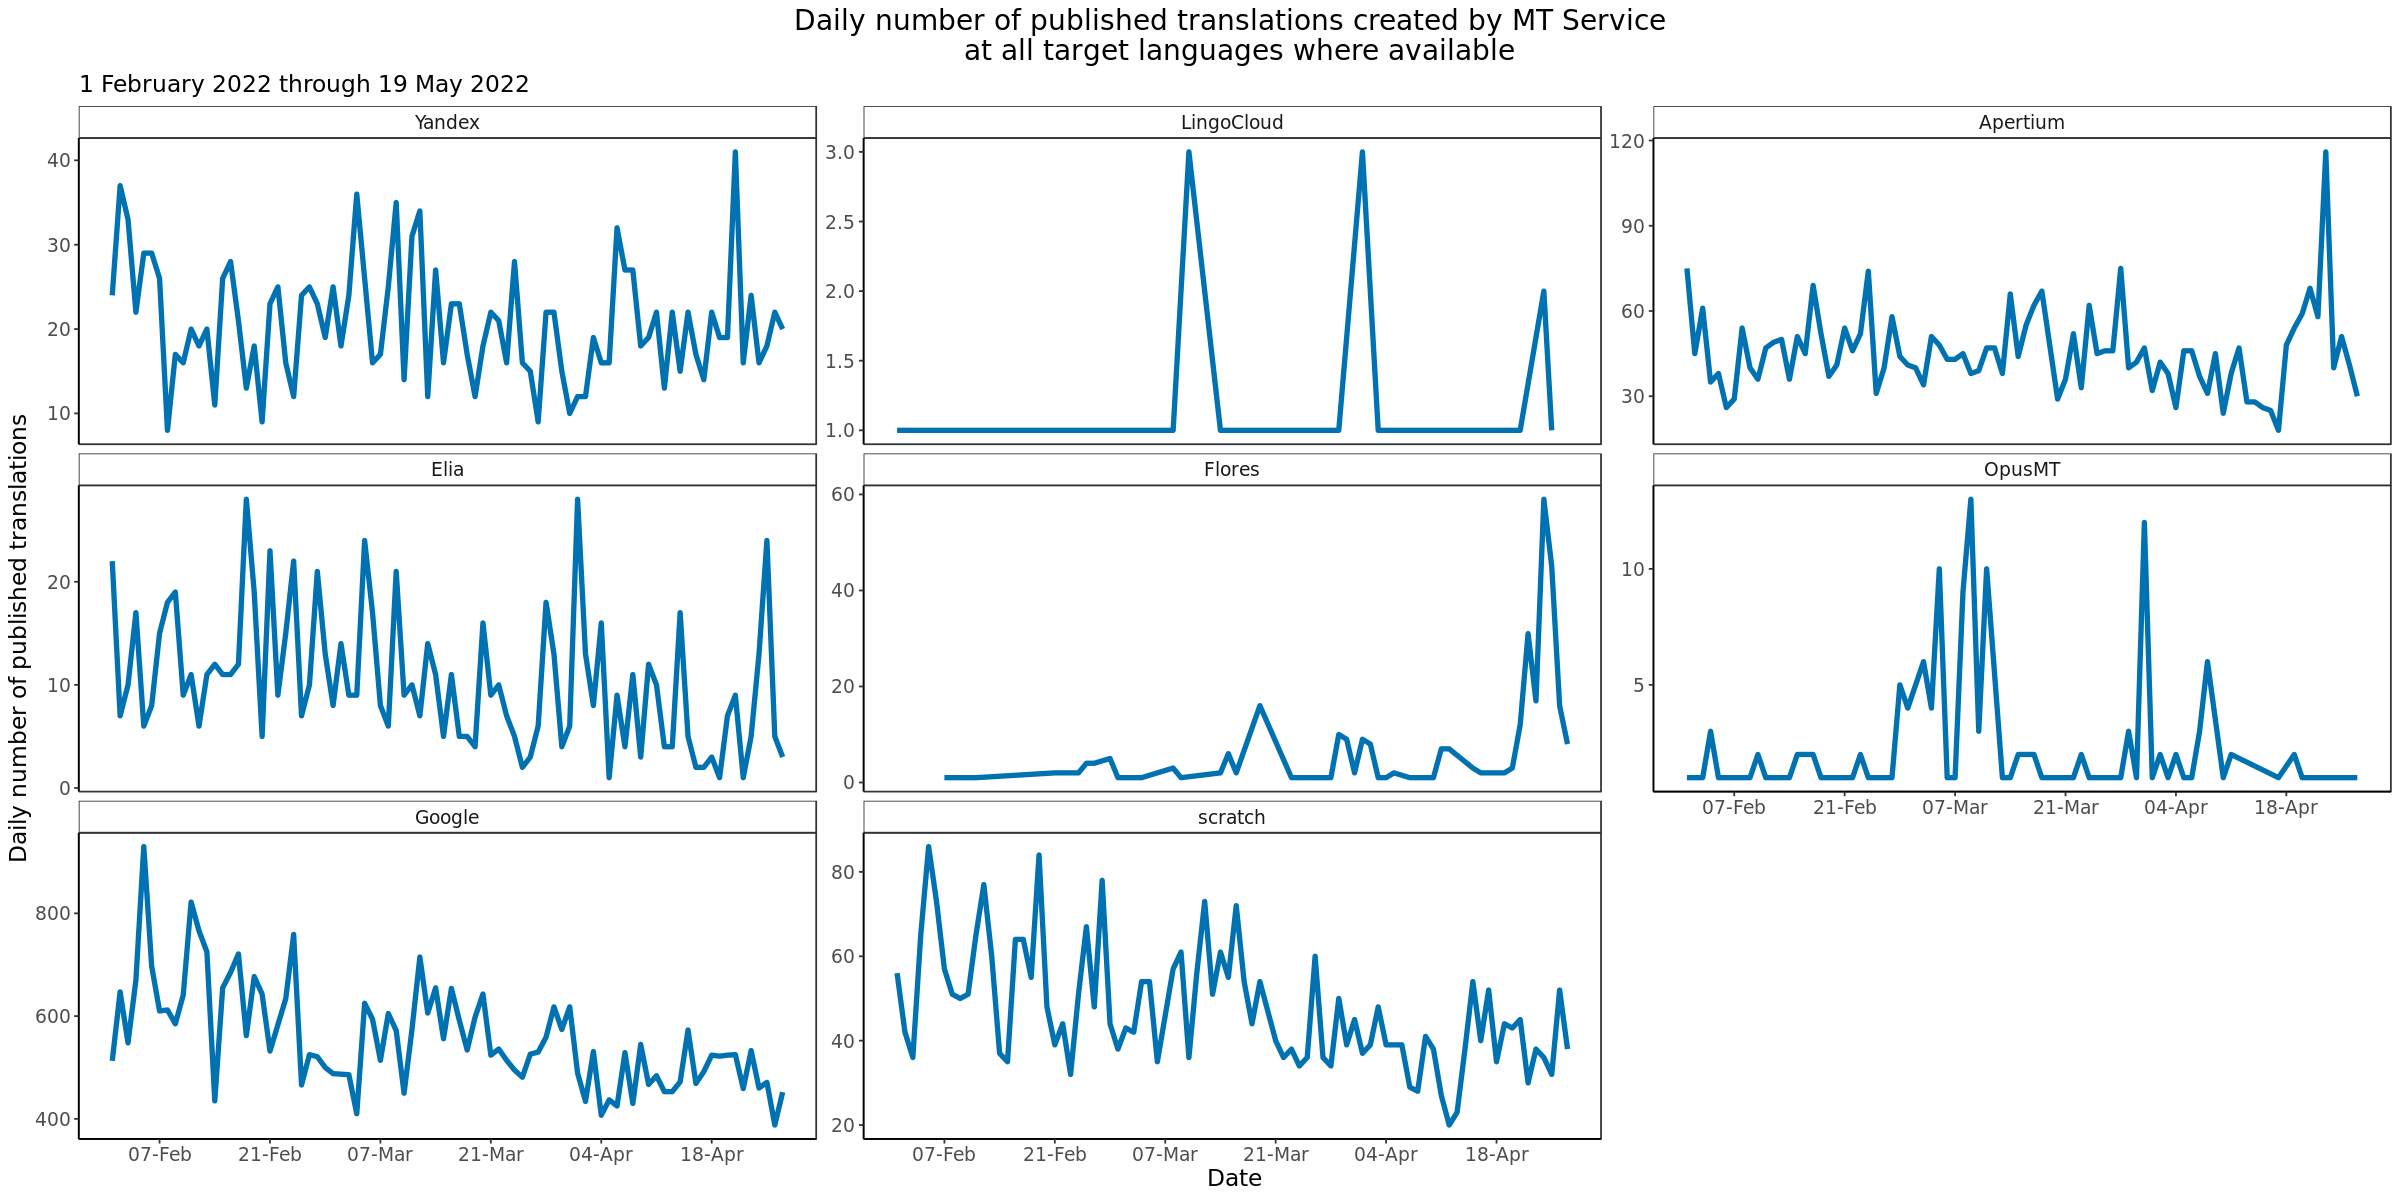

In [208]:
options(repr.plot.width = 20, repr.plot.height = 10)


p <- mt_service_compare %>%
    group_by(translation_start_time, mt_service) %>% 
    summarise(num_translations = n_distinct(translation_id), .groups = 'drop')  %>% 
    ggplot(aes(x= translation_start_time, y = num_translations)) +
    geom_line(size = 1.5, color = "#0072B2") +
    facet_wrap(~ mt_service, scale = "free_y") + 
    scale_x_date(date_labels = "%d-%b", date_breaks = "2 weeks", minor_breaks = NULL) +
    labs (y = "Daily number of published translations",
          x = "Date",
         title = "Daily number of published translations created by MT Service \n at all target languages where available",
         subtitle = "1 February 2022 through 19 May 2022")  +
    theme_bw() +
   theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"))
            

ggsave("Figures/mt_service_usage_byday.png", p, width = 16, height = 8, units = "in", dpi = 300)

p

Looking at daily usage trends, there been an increase in Flores usage in April coinciding with deployment of the service as default at more languages (Icelandic, Igbo and Zulu). There was also a mid-April increase in Apertium usage. 

## Usage by language pair

We reviewed the number and percent of publications by each machine translation service at each langauage pair (i.e. source language and target language). Due to the large combination of language pairs, data was saved to google [spreadsheet](https://docs.google.com/spreadsheets/d/1qLNWAnofzxOAfbvqLJBKmyh2chMz9Y8zwybFDqemWpc/edit#gid=1382755386) to easily filter and identify percent of publications by language pair for each machine translation service. 

In [243]:
# Compare overall usage by source and target
mt_compare_bylangpair <- mt_service_compare %>%
    group_by(source_language, target_language, mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3)) 

`summarise()` regrouping output by 'source_language', 'target_language' (override with `.groups` argument)



In [245]:
# Save aggregated data for further exploration in google doc
write_csv(
    x = mt_compare_bylangpair,
    file = 'Data/mt_compare_bylangpair.csv',
    col_names = TRUE)
  

## Usage at each target language

We next took a closer look at each machine translation service, identifying its usage at all target language where available and identifying the languages each service is helping to support the most. This was reviewed alongside the usage by language pair analysis to provide context or insights based on the transation service's use as a default or availability of other options at the target language. Key obervations are summarized below.

Method: For each machine translation service, we reviewed its usage compared to other machine translations services available at the target languages it currently supports. Note: The charts below do not include target languages where the service is available but was not used during the reviewed timeframe.  

Please see the [languages supported](https://www.mediawiki.org/wiki/Help:Content_translation/Translating/Initial_machine_translation?useskin=vector-2022#Machine_translation_availability) for details on all supported langagues by MT service.

### Yandex

Since 4th November 2015, Yandex machine translation system has been available for users of Content Translation and was used to translation 3% of all translations since February 2022. It is available for more than 70 languages but not available when creating pages into English.  

You can find more details on the [Yandex mediawiki page](https://www.mediawiki.org/w/index.php?title=Content_translation/Machine_Translation/Yandex&useskin=vector-2022).

In [267]:
# list of languages where yandex was used in language pairs
yandex_languages = mt_service_compare$target_language[mt_service_compare$mt_service == 'Yandex']

In [268]:
# restrict to usage of yandex in different langauges where available
yandex_data <- mt_service_compare %>%
    filter(target_language %in% yandex_languages)  

In [269]:
# Compare usage by target language
yandex_usage_compare_bytarget <- yandex_data %>%
    group_by(target_language, mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3)) 

`summarise()` regrouping output by 'target_language' (override with `.groups` argument)



In [270]:
# order target languages based on factor levels

lvls <- as.character(yandex_usage_compare_bytarget$target_language[yandex_usage_compare_bytarget$mt_service=="Yandex"])[order(yandex_usage_compare_bytarget$pct_translations[yandex_usage_compare_bytarget$mt_service=="Yandex"])]
yandex_usage_compare_bytarget$target_language<- factor(yandex_usage_compare_bytarget$target_language,levels=lvls)

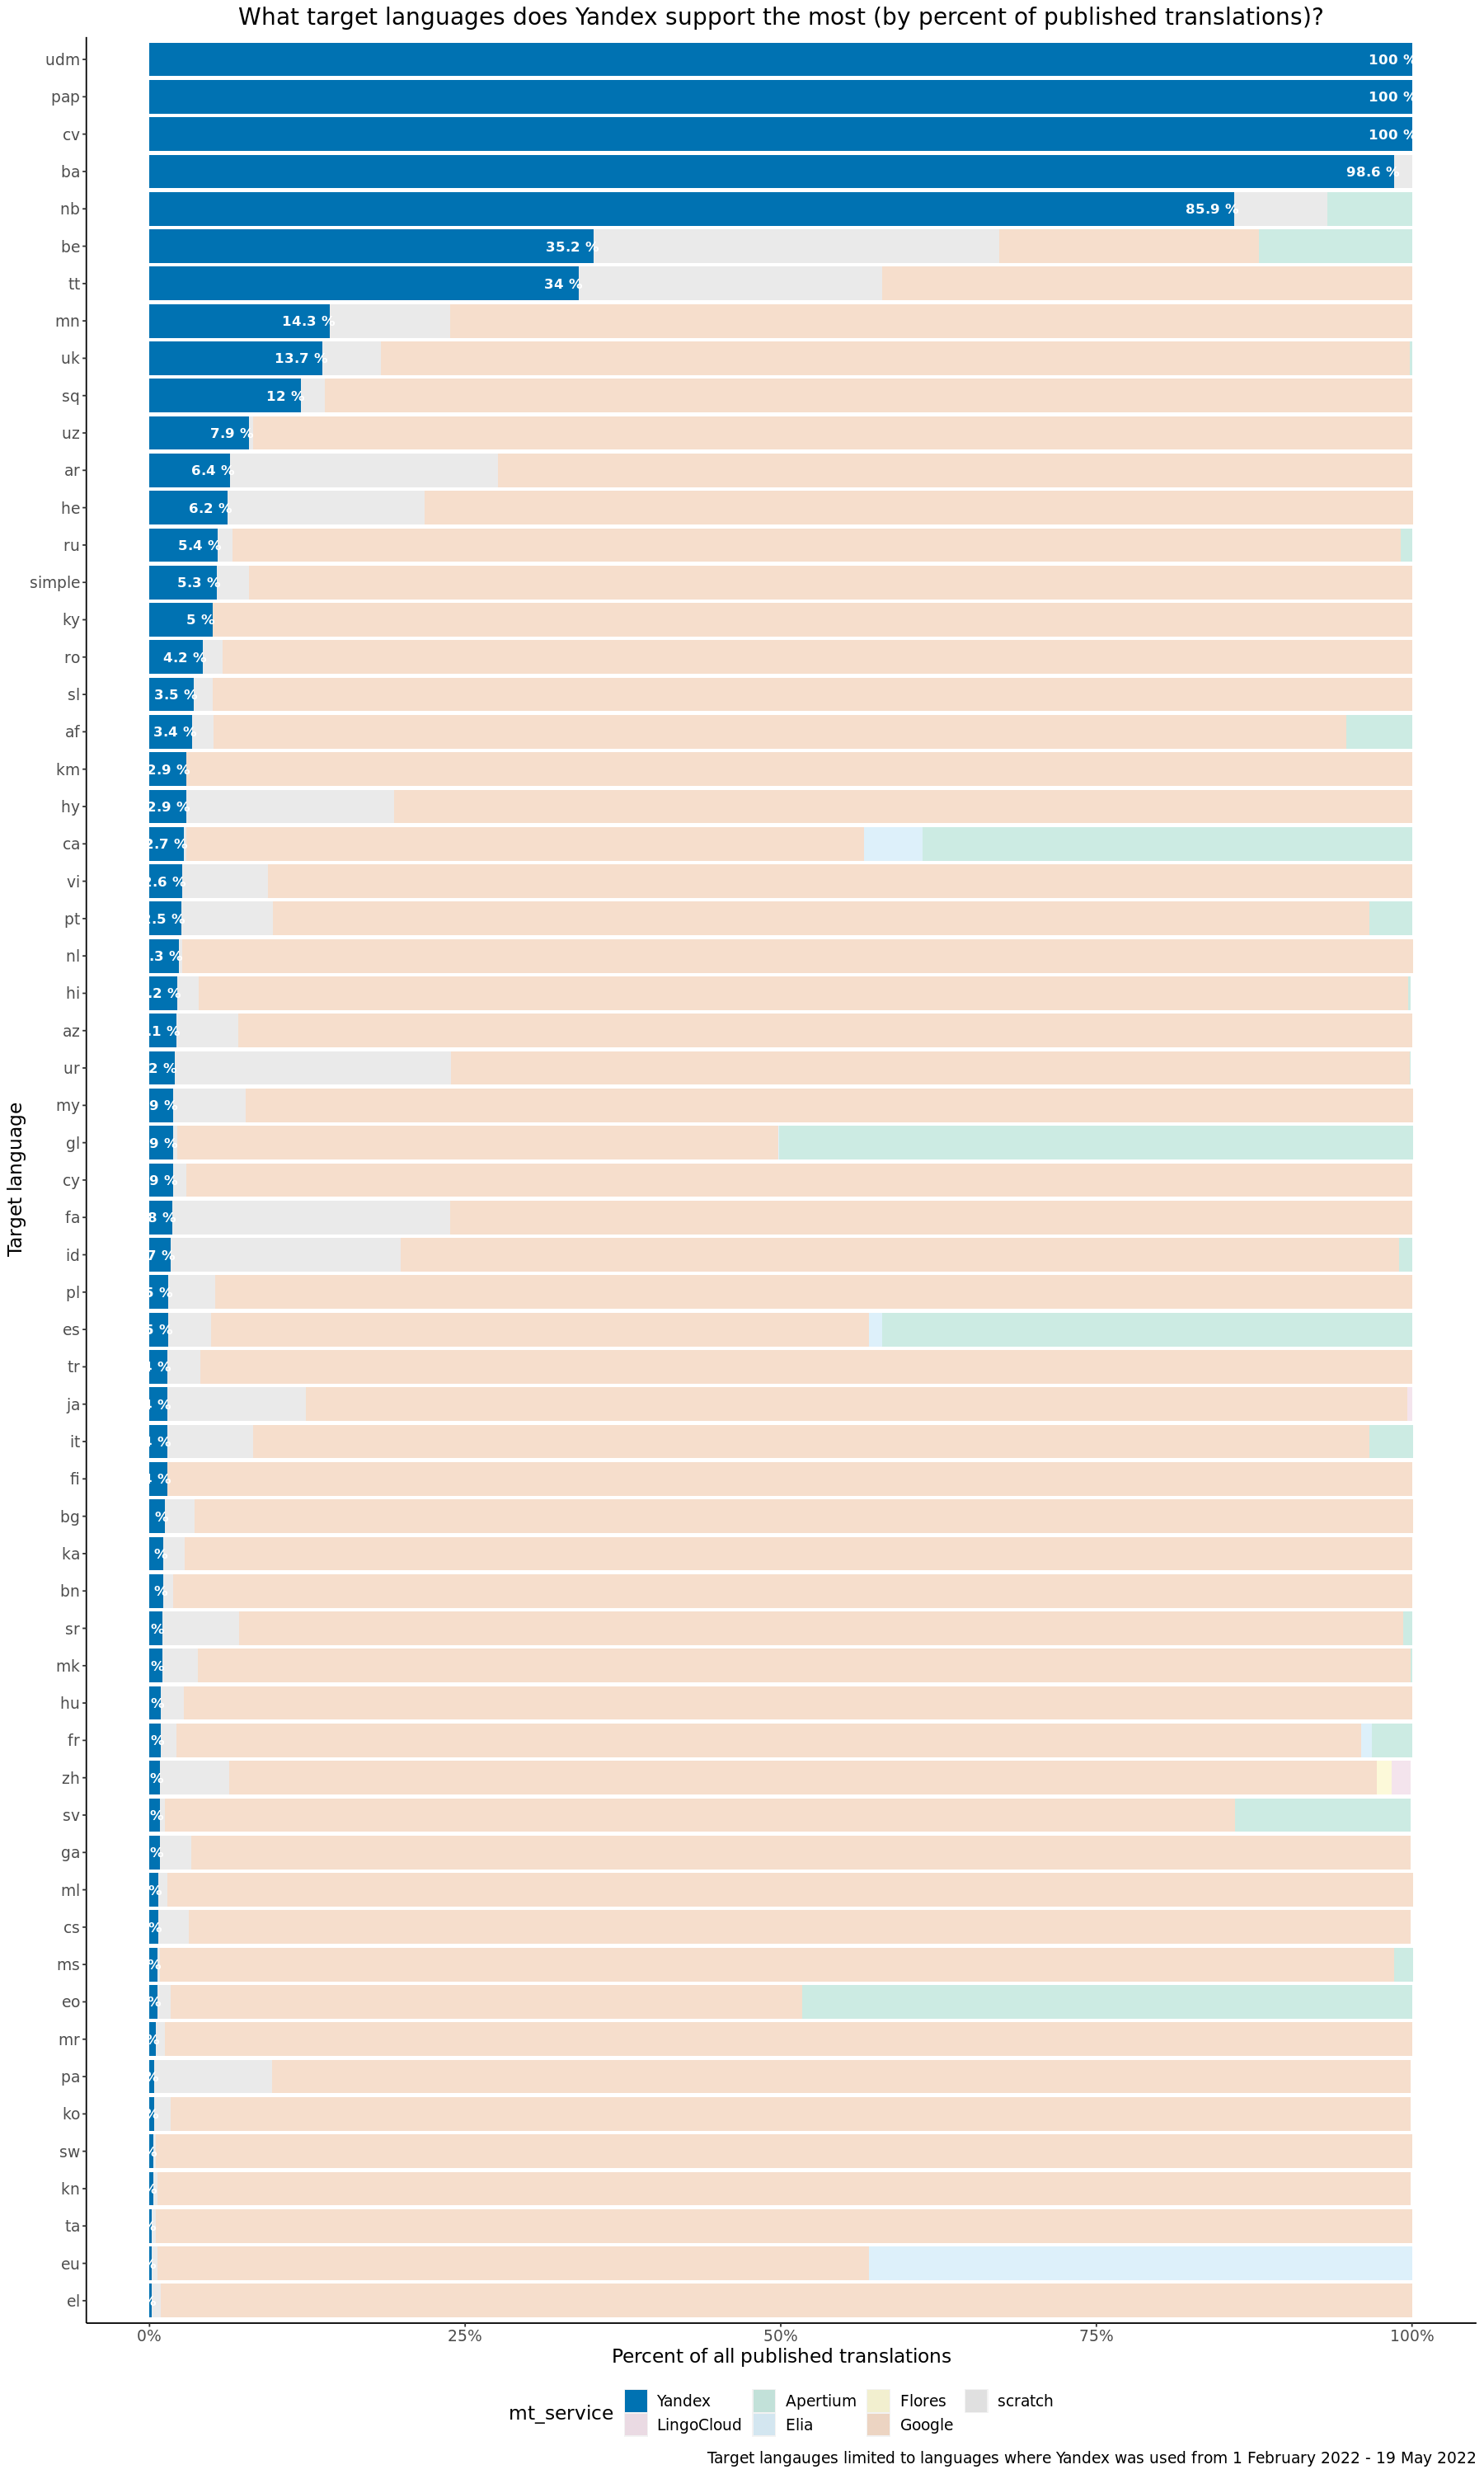

In [271]:
options(repr.plot.width = 15, repr.plot.height = 25)

p <- yandex_usage_compare_bytarget %>%
        ggplot(aes(x = target_language, y= pct_translations, fill = mt_service, 
                 label = ifelse(mt_service == 'Yandex', paste(round(pct_translations * 100,2), "%"), " "))) +
        geom_bar(aes(alpha = mt_service == 'Yandex'), stat = 'identity') +
        scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.2), guide = F) +
        coord_flip() +
        geom_text(size = 3.5, fontface = "bold", color = 'white', hjust = 0.9) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "Target language",
              y = "Percent of all published translations",
             title = "What target languages does Yandex support the most (by percent of published translations)?",
              caption = "Target langauges limited to languages where Yandex was used from 1 February 2022 - 19 May 2022"
             ) +
         guides(fill = guide_legend(override.aes= list(alpha = c(1,0.2, 0.2,0.2,0.2, 0.2, 0.2)))) +
         scale_fill_manual(values = c("#0072B2", "#CC79A7", "#009E73", "#56B4E9", "#F0E442",  "#D55E00", "#999999")) +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
            

ggsave("Figures/yandex_usage_compare_bytarget.png", p, width = 16, height = 8, units = "in", dpi = 300)
  p
    
    

**Observations:**
* Yandex is currently used to support 100% of published translations (excluding from scratch translations) at Udmurt (udm), Papiamentu (pap), Chuvash (cv), and Bashki (ba) target languages. This is expected as it's the only available machine translation service for the language pairs where the translations occured during the reviewed timeframe.
* For target languages where other translations services were also used, Yandex is used most frequently at Norwegian (Bokmål) (nb), Belarusian (be), and Tatar (tt). 
   * For the Belarusian (be) target language, Yandex was used as a non-default service for the following source languages: English (en), Russian (ru), and Ukrainian (uk). 
     * Apertium is offered as default service for translations from Russian (ru) to  Belarusian (be); however, Yandex has been used more frequently (43.9% Yandex translations compared to 16.4% Apertium translations). For the uk - be language pair, it is used for 40% of published translations compared to 60% by Google Translate. 
   * For the Norwegian (Bokmål) (nb) and Tatar (tt) target languages, Yandex was only used at source languages where it was the only service available.

### LingoCloud

LingoCloud can only be used to translate from English to Chinese, and Chinese to Japanese, and Japanese to Chinese. As a result, it is has only been used to translate 0.06% of all published translation since February 2022.

You can find more details on the [LingoCloud mediawiki page](https://www.mediawiki.org/w/index.php?title=Content_translation/Machine_Translation/LingoCloud&useskin=vector-2022)

In [295]:
# list of target language where lingo was used
lingocloud_languages = mt_service_compare$target_language[mt_service_compare$mt_service == 'LingoCloud']

In [296]:
# restrict to usage of lingo in different langauges where available
lingocloud_data <- mt_service_compare %>%
    filter(target_language %in% lingocloud_languages)  

In [331]:
# Compare usage
lingocloud_usage_compare <- lingocloud_data %>%
    group_by(target_language, mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = num_translations/sum(num_translations))  %>%
    arrange(desc(pct_translations))
 

`summarise()` regrouping output by 'target_language' (override with `.groups` argument)



In [333]:
# order target languages based on factor levels

lvls <- as.character(lingocloud_usage_compare$target_language[lingocloud_usage_compare$mt_service=="LingoCloud"])[order(lingocloud_usage_compare$pct_translations[lingocloud_usage_compare$mt_service=="LingoCloud"])]
lingocloud_usage_compare$target_language <- factor(lingocloud_usage_compare$target_language,levels=lvls)

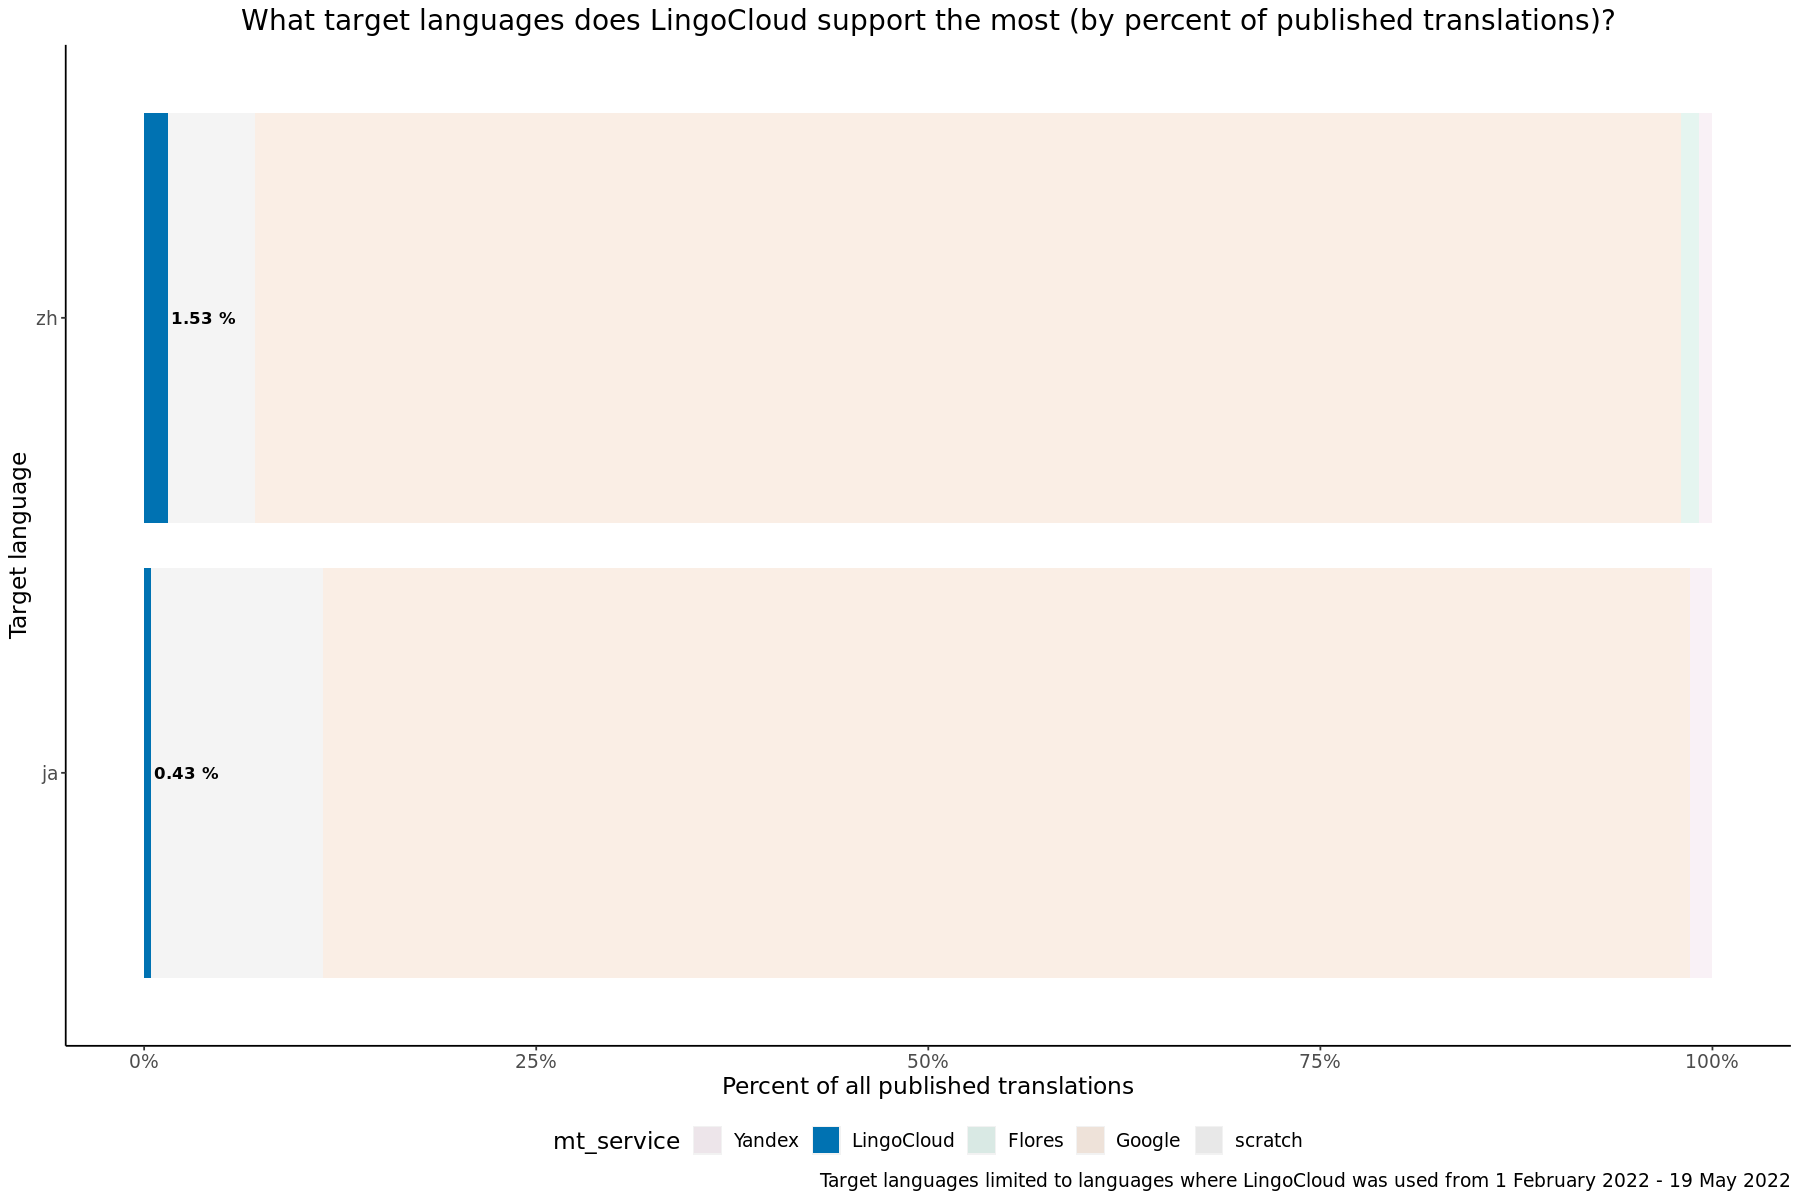

In [427]:
# Chart usage compared to other services

options(repr.plot.width = 15, repr.plot.height = 10)

p <- lingocloud_usage_compare %>%
        ggplot(aes(x = target_language, y= pct_translations, fill = mt_service, 
                 label = ifelse(mt_service == 'LingoCloud', paste(round(pct_translations * 100,2), "%"), " ")))  +
        coord_flip() +
       geom_bar(aes(alpha = mt_service == 'LingoCloud'), stat = 'identity') +
       scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.1), guide = F) +
        geom_text(size = 3.5, fontface = "bold", color = 'black', hjust = -0.05) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "Target language",
              y = "Percent of all published translations",
             title = "What target languages does LingoCloud support the most (by percent of published translations)?",
               caption = "Target languages limited to languages where LingoCloud was used from 1 February 2022 - 19 May 2022"
             ) +
         guides(fill = guide_legend(override.aes= list(alpha = c(0.1,1, 0.1, 0.1, 0.1)))) +
         scale_fill_manual(values = c("#CC79A7", "#0072B2", "#009E73",  "#D55E00", "#999999")) +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
            

ggsave("Figures/lingocloud_usage_compare.png", p, width = 16, height = 8, units = "in", dpi = 300)
  p
    

* LingoCloud is used more to support the Chinese (zh) target language (1.5%) compared to the Japanese target language (zh) (0.4%).
* Google Translate is used for the vast majority of published translations at both Japanese and Chinese target languages, with a small amount of published translations using Flores and Yandex.
*  LingoCloud has been used most frequently for translations from Simple English (simple) to Chinese. It was used for 25% of all published translations for this language pair. 

### Apertium

Apertium has about 37 language pairs for supporting machine translation and is the second most used machine translation service (6.6% of all published translations). You can find more details on the [Apertium mediawiki page](https://www.mediawiki.org/w/index.php?title=Content_translation/Machine_Translation/Apertium&useskin=vector-2022)

In [345]:
# list of languages where Apertium was used in target language
apertium_languages = mt_service_compare$target_language[mt_service_compare$mt_service == 'Apertium']

In [346]:
# restrict to usage of Apertium in different langauges where available
apertium_data <- mt_service_compare %>%
    filter(target_language %in% apertium_languages)  

In [347]:
# Compare usage
apertium_usage_compare <- apertium_data %>%
    group_by(target_language, mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3)) 

`summarise()` regrouping output by 'target_language' (override with `.groups` argument)



In [348]:
# order target languages based on factor levels

lvls <- as.character(apertium_usage_compare$target_language[apertium_usage_compare$mt_service=="Apertium"])[order(apertium_usage_compare$pct_translations[apertium_usage_compare$mt_service=="Apertium"])]
apertium_usage_compare$target_language <- factor(apertium_usage_compare$target_language,levels=lvls)

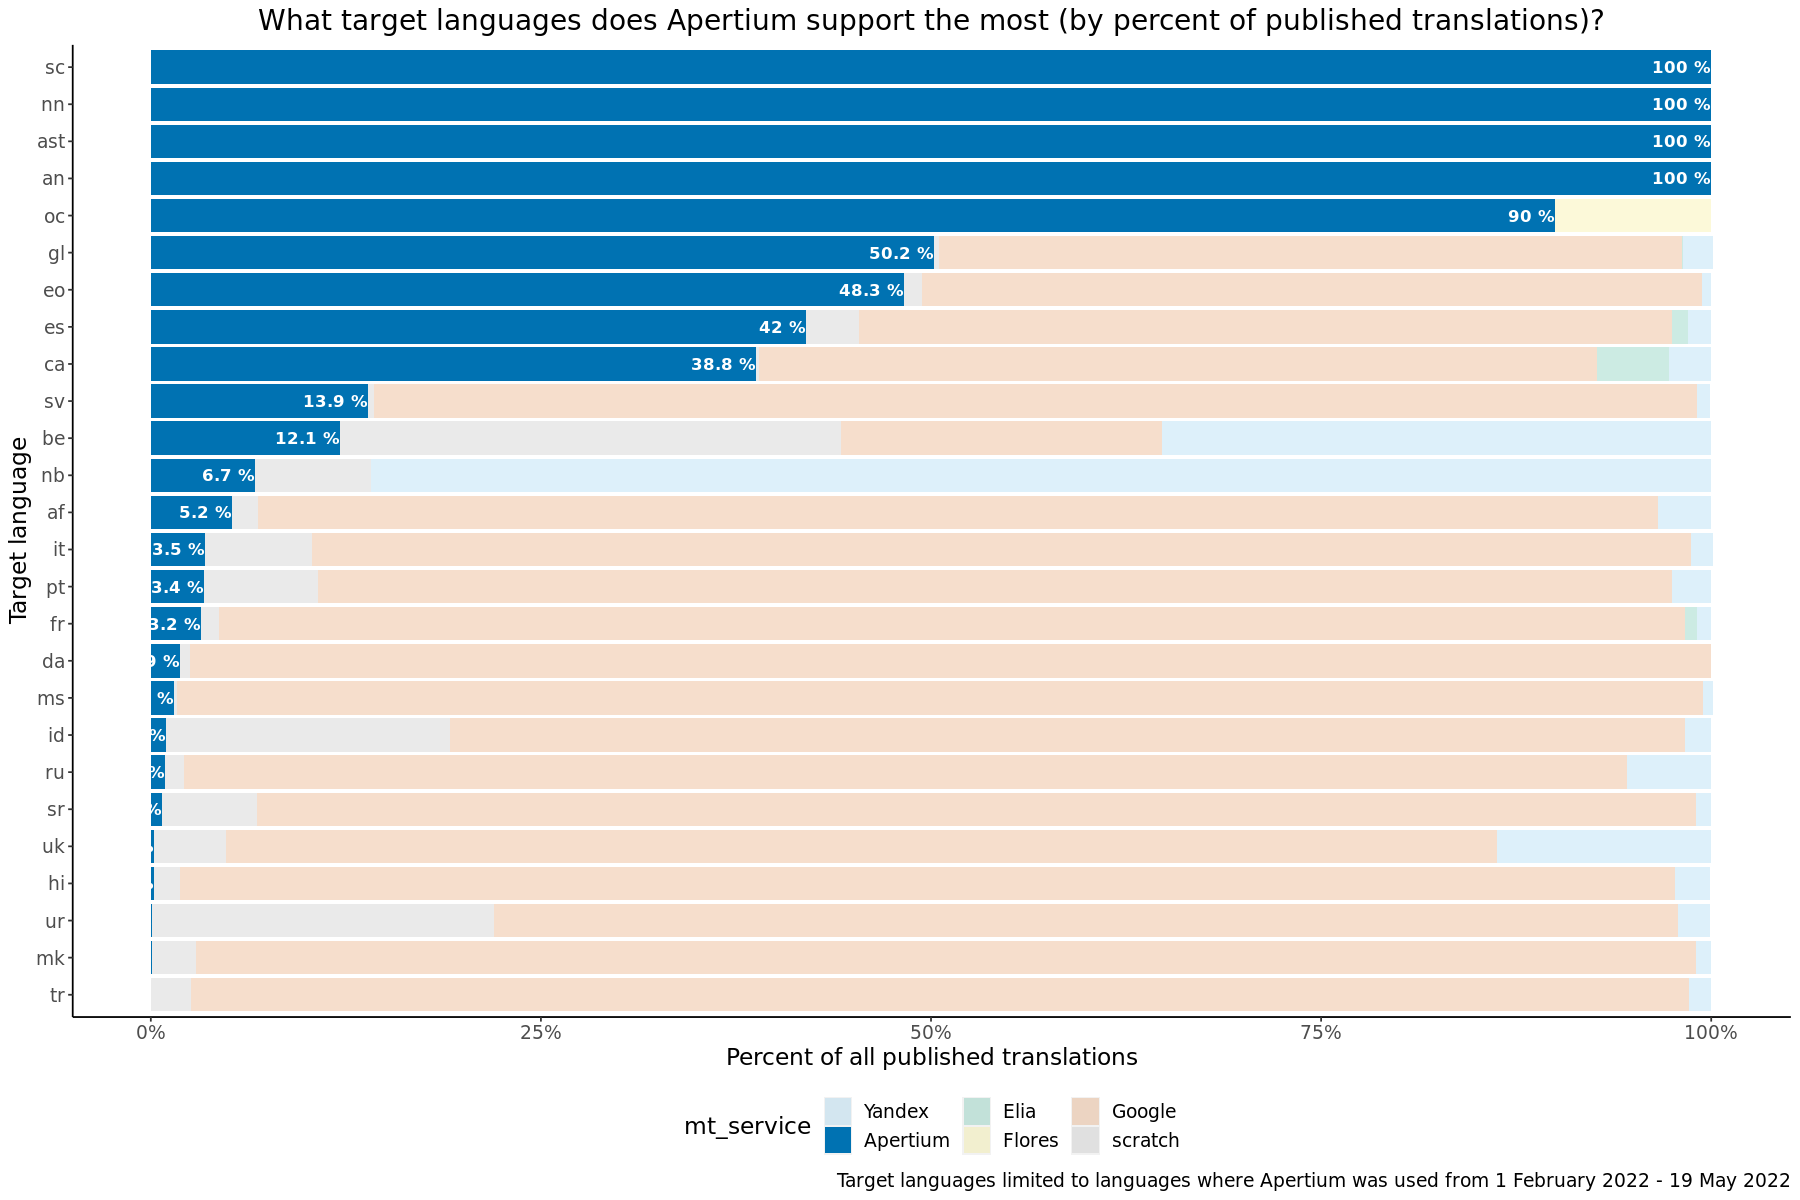

In [352]:
# Chart usage compared to other services

options(repr.plot.width = 15, repr.plot.height = 10)

p <- apertium_usage_compare %>%
        ggplot(aes(x = target_language, y= pct_translations, fill = mt_service, 
                 label = ifelse(mt_service == 'Apertium', paste(round(pct_translations * 100,2), "%"), " ")))  +
        coord_flip() +
       geom_bar(aes(alpha = mt_service == 'Apertium'), stat = 'identity') +
       scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.2), guide = F) +
        geom_text(size = 3.5, fontface = "bold", color = 'white', hjust = 1) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "Target language",
              y = "Percent of all published translations",
             title = "What target languages does Apertium support the most (by percent of published translations)?",
            caption = "Target languages limited to languages where Apertium was used from 1 February 2022 - 19 May 2022"
             ) +
         guides(fill = guide_legend(override.aes= list(alpha = c(0.2,1,0.2, 0.2, 0.2, 0.2)))) +
         scale_fill_manual(values = c( "#56B4E9","#0072B2", "#009E73", "#F0E442","#D55E00", "#999999")) +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
            

ggsave("Figures/apertium_usage_compare.png", p, width = 16, height = 8, units = "in", dpi = 300)
  p
    

* Apertium has been used for 100% of published translations at the following target languages: Sardinian (sc), Norwegian (Nynorsk) (nn),  Asturian (ast), and Aragonese (an). This is expected as its the only available machine translation service for the language pair where the translations occured during the reviewed timeframe.
* For the Occitan (oc) target language, Apertium was used for 90% of the published translations. Note: Flores is the default service for all translations from English to Occitan and account for 10% of published translations at Occitan.
* Appertium was used for between 38 to 51% of published translations at the following target languages: Galician (gl), Esperanto (eo), Spanish (es), and Catalan (ca). 
  * At these target langugage, Apertium was only used at language pairs where it was provided as the default service except for one translation from Simple English (simple) to Galician (gl) where Google was the default service but Apertium was used instead. 
  * For the following language pairs, Apertium is the default service but Google was used more frequently to publish translations at the language pair: pt to gl, en to es, en to ca, fr to ca, and it to ca. 
  

### Elia (formerly know as Matxin)

Elia was primarily created by for writing Wikipedia articles in Basque and Spanish and has only been used to translate 1.5% of published translation across all target langugages.  You can find more details on the [Elia mediawiki page](https://www.mediawiki.org/wiki/Content_translation/Machine_Translation/Matxin?useskin=vector-2022).


In [353]:
# list of languages where Elia was used in language pairs
elia_languages = mt_service_compare$target_language[mt_service_compare$mt_service == 'Elia']

In [354]:
# restrict to usage of Elia in different langauges where available
elia_data <- mt_service_compare %>%
    filter(target_language %in% elia_languages)  

In [355]:
# Compare usage
elia_usage_compare <- elia_data %>%
    group_by(target_language, mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3)) 

`summarise()` regrouping output by 'target_language' (override with `.groups` argument)



In [356]:
# order target languages based on factor levels

lvls <- as.character(elia_usage_compare$target_language[elia_usage_compare$mt_service=="Elia"])[order(elia_usage_compare$pct_translations[elia_usage_compare$mt_service=="Elia"])]
elia_usage_compare$target_language <- factor(elia_usage_compare$target_language,levels=lvls)

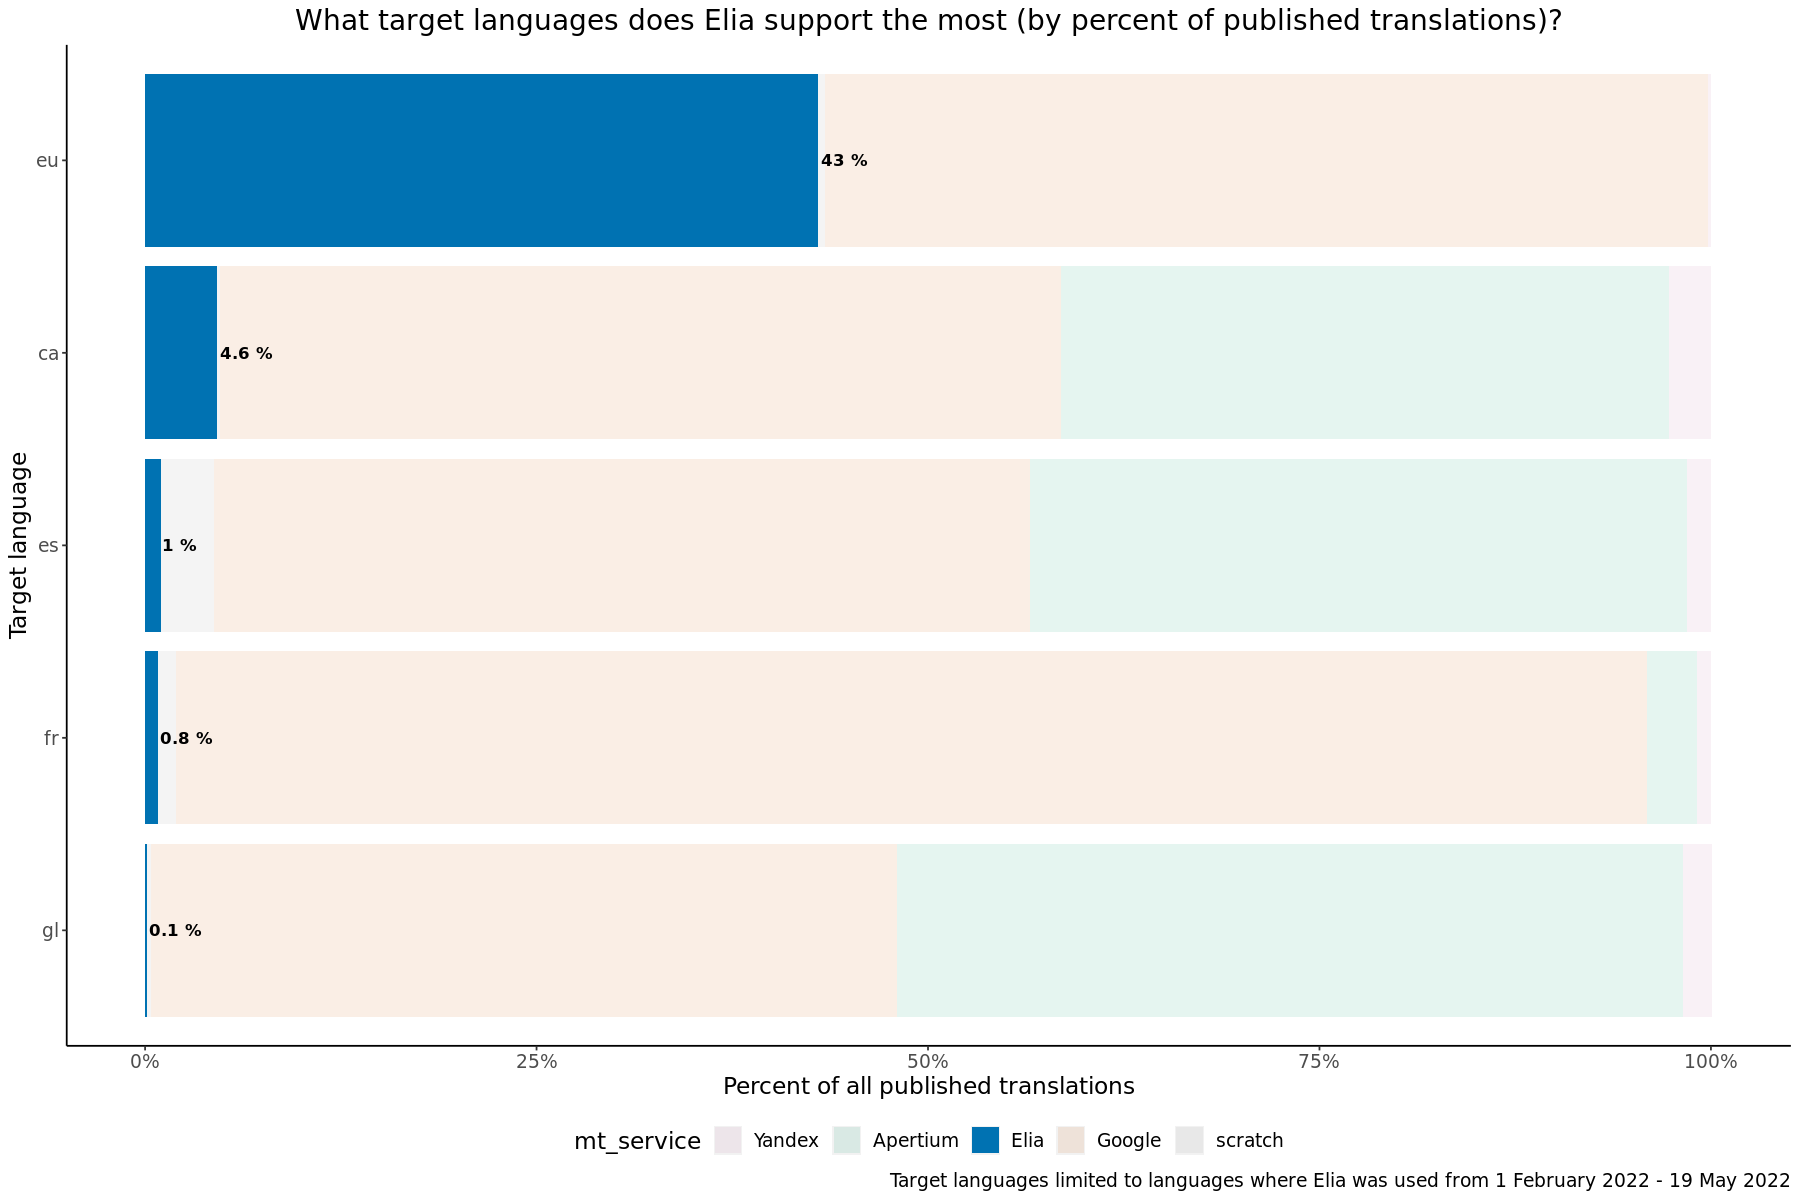

In [426]:
# Chart usage compared to other services

options(repr.plot.width = 15, repr.plot.height = 10)

p <- elia_usage_compare %>%
        ggplot(aes(x = target_language, y= pct_translations, fill = mt_service, 
                 label = ifelse(mt_service == 'Elia', paste(round(pct_translations * 100,2), "%"), " "))) +
        coord_flip() +
       geom_bar(aes(alpha = mt_service == 'Elia'), stat = 'identity') +
       scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.1), guide = F) +
        geom_text(size = 3.5, fontface = "bold", color = 'black', hjust = -0.05) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "Target language",
              y = "Percent of all published translations",
             title = "What target languages does Elia support the most (by percent of published translations)?",
              caption = "Target languages limited to languages where Elia was used from 1 February 2022 - 19 May 2022"
             ) +
         guides(fill = guide_legend(override.aes= list(alpha = c(0.1,0.1,1, 0.1, 0.1)))) +
         scale_fill_manual(values = c( "#CC79A7", "#009E73", "#0072B2","#D55E00",  "#999999" )) +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
            

ggsave("Figures/elia_usage_compare.png", p, width = 16, height = 8, units = "in", dpi = 300)
  p
    

* Elia is most frequently used at the Basque (eu) target language, where it used for 43% of published translations at this target language. Google translate (the default service for Basque translations from Spanish, French ,and Galician source langauges) was used for the other 57% of translations.
* Catalan (ca) is the second most supported target language by Elia. 4.6% of all published translations at Catalan are created using Elia.
* Elia is used for 1% or fewer published translations at Spanish (es), French (fr), and Galician (gl) target languages.

### Flores

Flores was recently deployed as a machine translation service in February 2022 and has been used to translate 0.5% of all published translations since it become available. Flores can currently be used to translate from English to Chinese, Icelandic, Hausa, Zulu, Igbo, Occitan, and Luganda. In addition to this report, a separate analysis on Flores usage was done in this [report](https://github.com/wikimedia-research/machine-translation-service-analysis-2022/blob/main/flores_usage_analysis.ipynb)

You can find more details on the [Flores mediawiki page](https://www.mediawiki.org/wiki/Content_translation/Machine_Translation/Flores?useskin=vector-2022).

In [365]:
# list of languages where Flores was used in language pairs
flores_languages = mt_service_compare$target_language[mt_service_compare$mt_service == 'Flores']

In [366]:
# restrict to usage of Flores in different langauges where available
flores_data <- mt_service_compare %>%
    filter(target_language %in% flores_languages)  

In [367]:
# Compare usage
flores_usage_compare <- flores_data %>%
    group_by(target_language, mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3)) 

`summarise()` regrouping output by 'target_language' (override with `.groups` argument)



In [368]:
# order target languages based on factor levels

lvls <- as.character(flores_usage_compare$target_language[flores_usage_compare$mt_service=="Flores"])[order(flores_usage_compare$pct_translations[flores_usage_compare$mt_service=="Flores"])]
flores_usage_compare$target_language <- factor(flores_usage_compare$target_language,levels=lvls)

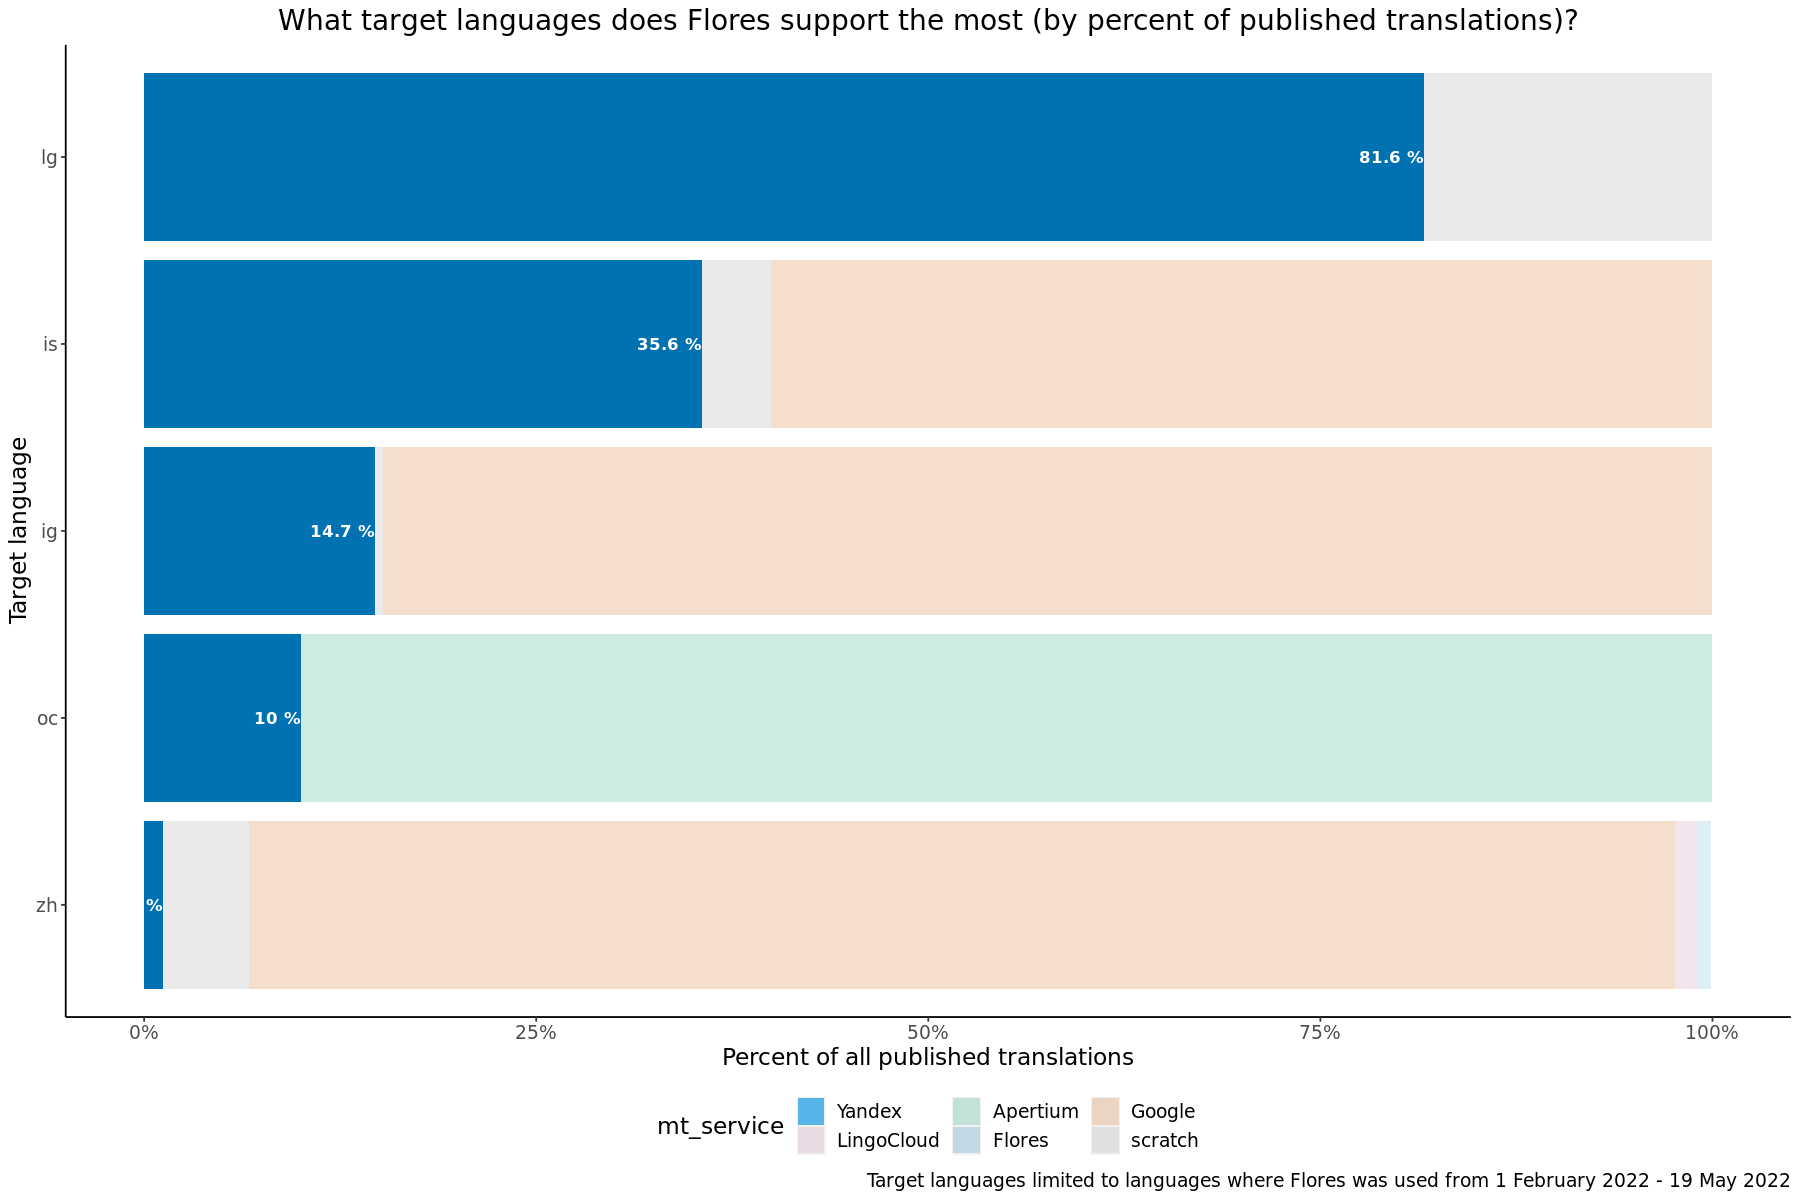

In [374]:
# Chart usage compared to other services

options(repr.plot.width = 15, repr.plot.height = 10)

p <- flores_usage_compare %>%
        ggplot(aes(x = target_language, y= pct_translations, fill = mt_service, 
                 label = ifelse(mt_service == 'Flores', paste(round(pct_translations * 100,2), "%"), " "))) +
        coord_flip() +
       geom_bar(aes(alpha = mt_service == 'Flores'), stat = 'identity') +
       scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.2), guide = F) +
        geom_text(size = 3.5, fontface = "bold", color = 'white', hjust = 1) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "Target language",
              y = "Percent of all published translations",
             title = "What target languages does Flores support the most (by percent of published translations)?",
              caption = "Target languages limited to languages where Flores was used from 1 February 2022 - 19 May 2022"
             ) +
         guides(fill = guide_legend(override.aes= list(alpha = c(1,0.2, 0.2, 0.2, 0.2, 0.2)))) +
         scale_fill_manual(values = c( "#56B4E9","#CC79A7",  "#009E73", "#0072B2","#D55E00", "#999999")) + 
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
            

ggsave("Figures/flores_usage_compare.png", p, width = 16, height = 8, units = "in", dpi = 300)
  p

* Flores has been used for 81.6% of all published translations at Luganda (lg) (the other 18.4% were created from scratch), which is expected as it was enabled by default for all translations from English to this target language.
* It has been used for 10% of all publications at Occitan (oc), where it is currently enabled as default for all English (en) to Luganda (lg) translations. Apertium is the default service for translations to Occitan from Catalan, Spanish and French languages.
* Flores has been used for 38% of all published translations at Icelandic (is) and 15% of all translations at Igbo (ig) since deployed. Note: Flores was deployed as the default service for all English to Icelandic and Igobo translations since mid-April.   
* It is used for less than 1% of translations at the Chinese target language; however, it not currently deployed as the default service for translations from  English to this target language.
* Flores has not currently been used to publish any translations at Zulu where it's also available. 

### Opus MT

OpusMT is an open source machine translation system that is currently only available to support translations from English to Assamese (as), Central Bicolano (bcl) and Tsonga (ts) target languages. It has been used to publish 0.28% of all published translations since February 2022. 
 

In [375]:
# list of languages where Opus was used in language pairs
opus_languages = mt_service_compare$target_language[mt_service_compare$mt_service == 'OpusMT']

In [376]:
# restrict to usage of Flores in different langauges where available
opus_data <- mt_service_compare %>%
    filter(target_language %in% opus_languages) 

In [377]:
# Compare usage
opus_usage_compare <- opus_data %>%
    group_by(target_language, mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3)) 

`summarise()` regrouping output by 'target_language' (override with `.groups` argument)



In [378]:
# order target languages based on factor levels

lvls <- as.character(opus_usage_compare$target_language[opus_usage_compare$mt_service=="OpusMT"])[order(opus_usage_compare$pct_translations[opus_usage_compare$mt_service=="OpusMT"])]
opus_usage_compare$target_language <- factor(opus_usage_compare$target_language,levels=lvls)

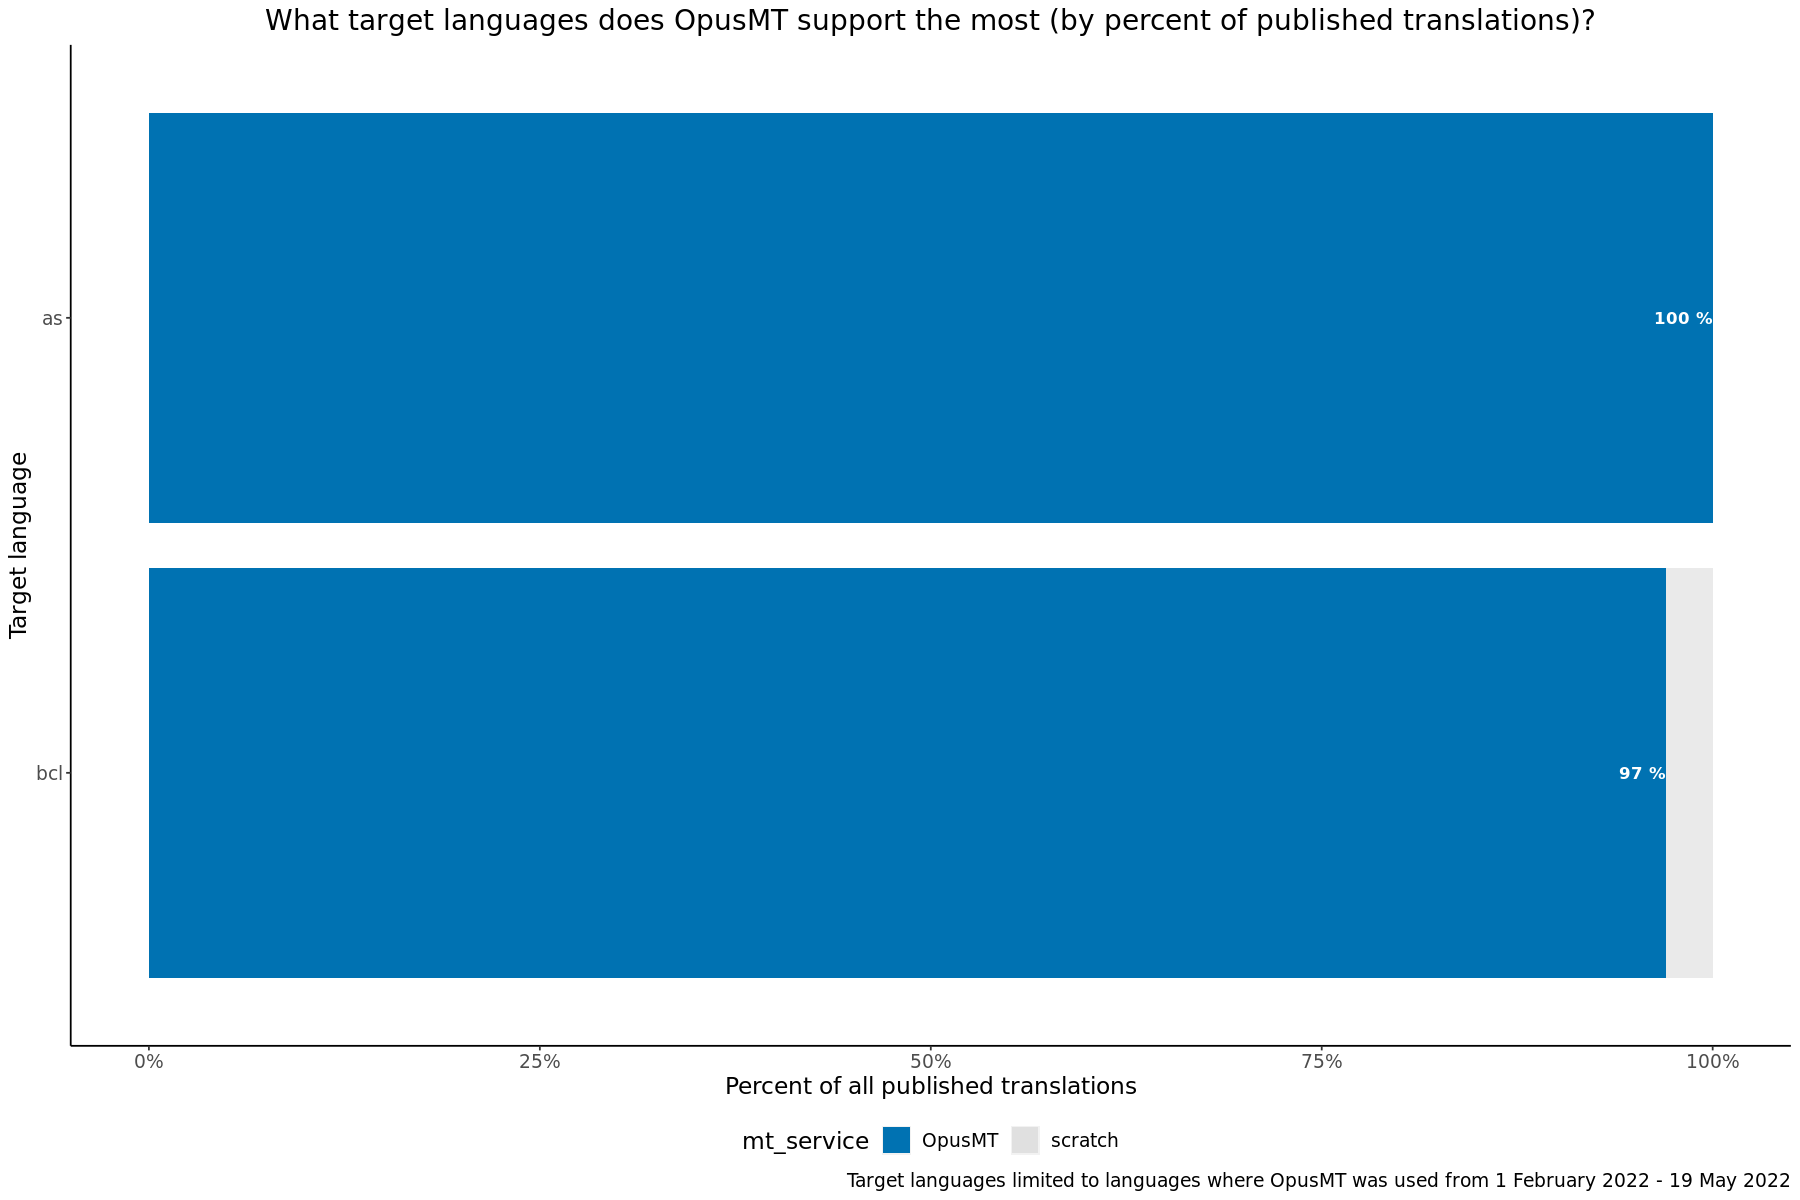

In [379]:
# Chart usage compared to other services

options(repr.plot.width = 15, repr.plot.height = 10)

p <- opus_usage_compare %>%
        ggplot(aes(x = target_language, y= pct_translations, fill = mt_service, 
                 label = ifelse(mt_service == 'OpusMT', paste(round(pct_translations * 100,2), "%"), " "))) +
        coord_flip() +
       geom_bar(aes(alpha = mt_service == 'OpusMT'), stat = 'identity') +
       scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.2), guide = F) +
        geom_text(size = 3.5, fontface = "bold", color = 'white', hjust = 1) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "Target language",
              y = "Percent of all published translations",
             title = "What target languages does OpusMT support the most (by percent of published translations)?",
              caption = "Target languages limited to languages where OpusMT was used from 1 February 2022 - 19 May 2022"
             ) +
         guides(fill = guide_legend(override.aes= list(alpha = c(1,0.2)))) +
         scale_fill_manual(values = c( "#0072B2", "#999999")) + 
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
            

ggsave("Figures/opusMt_usage_compare.png", p, width = 16, height = 8, units = "in", dpi = 300)
  p

* OpusMT has only been used to publish translations at Assamese (as) and Central Bicolano (bcl) target languages. 
* As the only service available at these target languaegs, it has been used for all published translations with the exception of 3% of Central Bicolano (bcl) translations which were started from scratch.
* There have neen no published translations at Tsonga (ts) where OpusMT is also available.

### Google Translate

Google Translate is the most frequently used machine translation service (used for 81% of all published translations) and supports about 100 languages. 

You can find more details on the [Google Translate mediawiki page](https://www.mediawiki.org/w/index.php?title=Content_translation/Machine_Translation/Google_Translate&useskin=vector-2022).


In [384]:
# list of languages where Google Translate was used in language pairs
google_languages = mt_service_compare$target_language[mt_service_compare$mt_service == 'Google']

In [385]:
# restrict to usage of Elia in different langauges where available
google_data <- mt_service_compare %>%
    filter(target_language %in% google_languages)  

In [387]:
# Compare usage
google_usage_compare <- google_data %>%
    group_by(target_language, mt_service) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3)) %>%
    filter(pct_translations != 1) #filter out language pairs where Google Translate usage was 100%

`summarise()` regrouping output by 'target_language' (override with `.groups` argument)



In [389]:
# order target languages based on factor levels

lvls <- as.character(google_usage_compare$target_language[google_usage_compare$mt_service=="Google"])[order(google_usage_compare$pct_translations[google_usage_compare$mt_service=="Google"])]
google_usage_compare$target_language <- factor(google_usage_compare$target_language,levels=lvls)

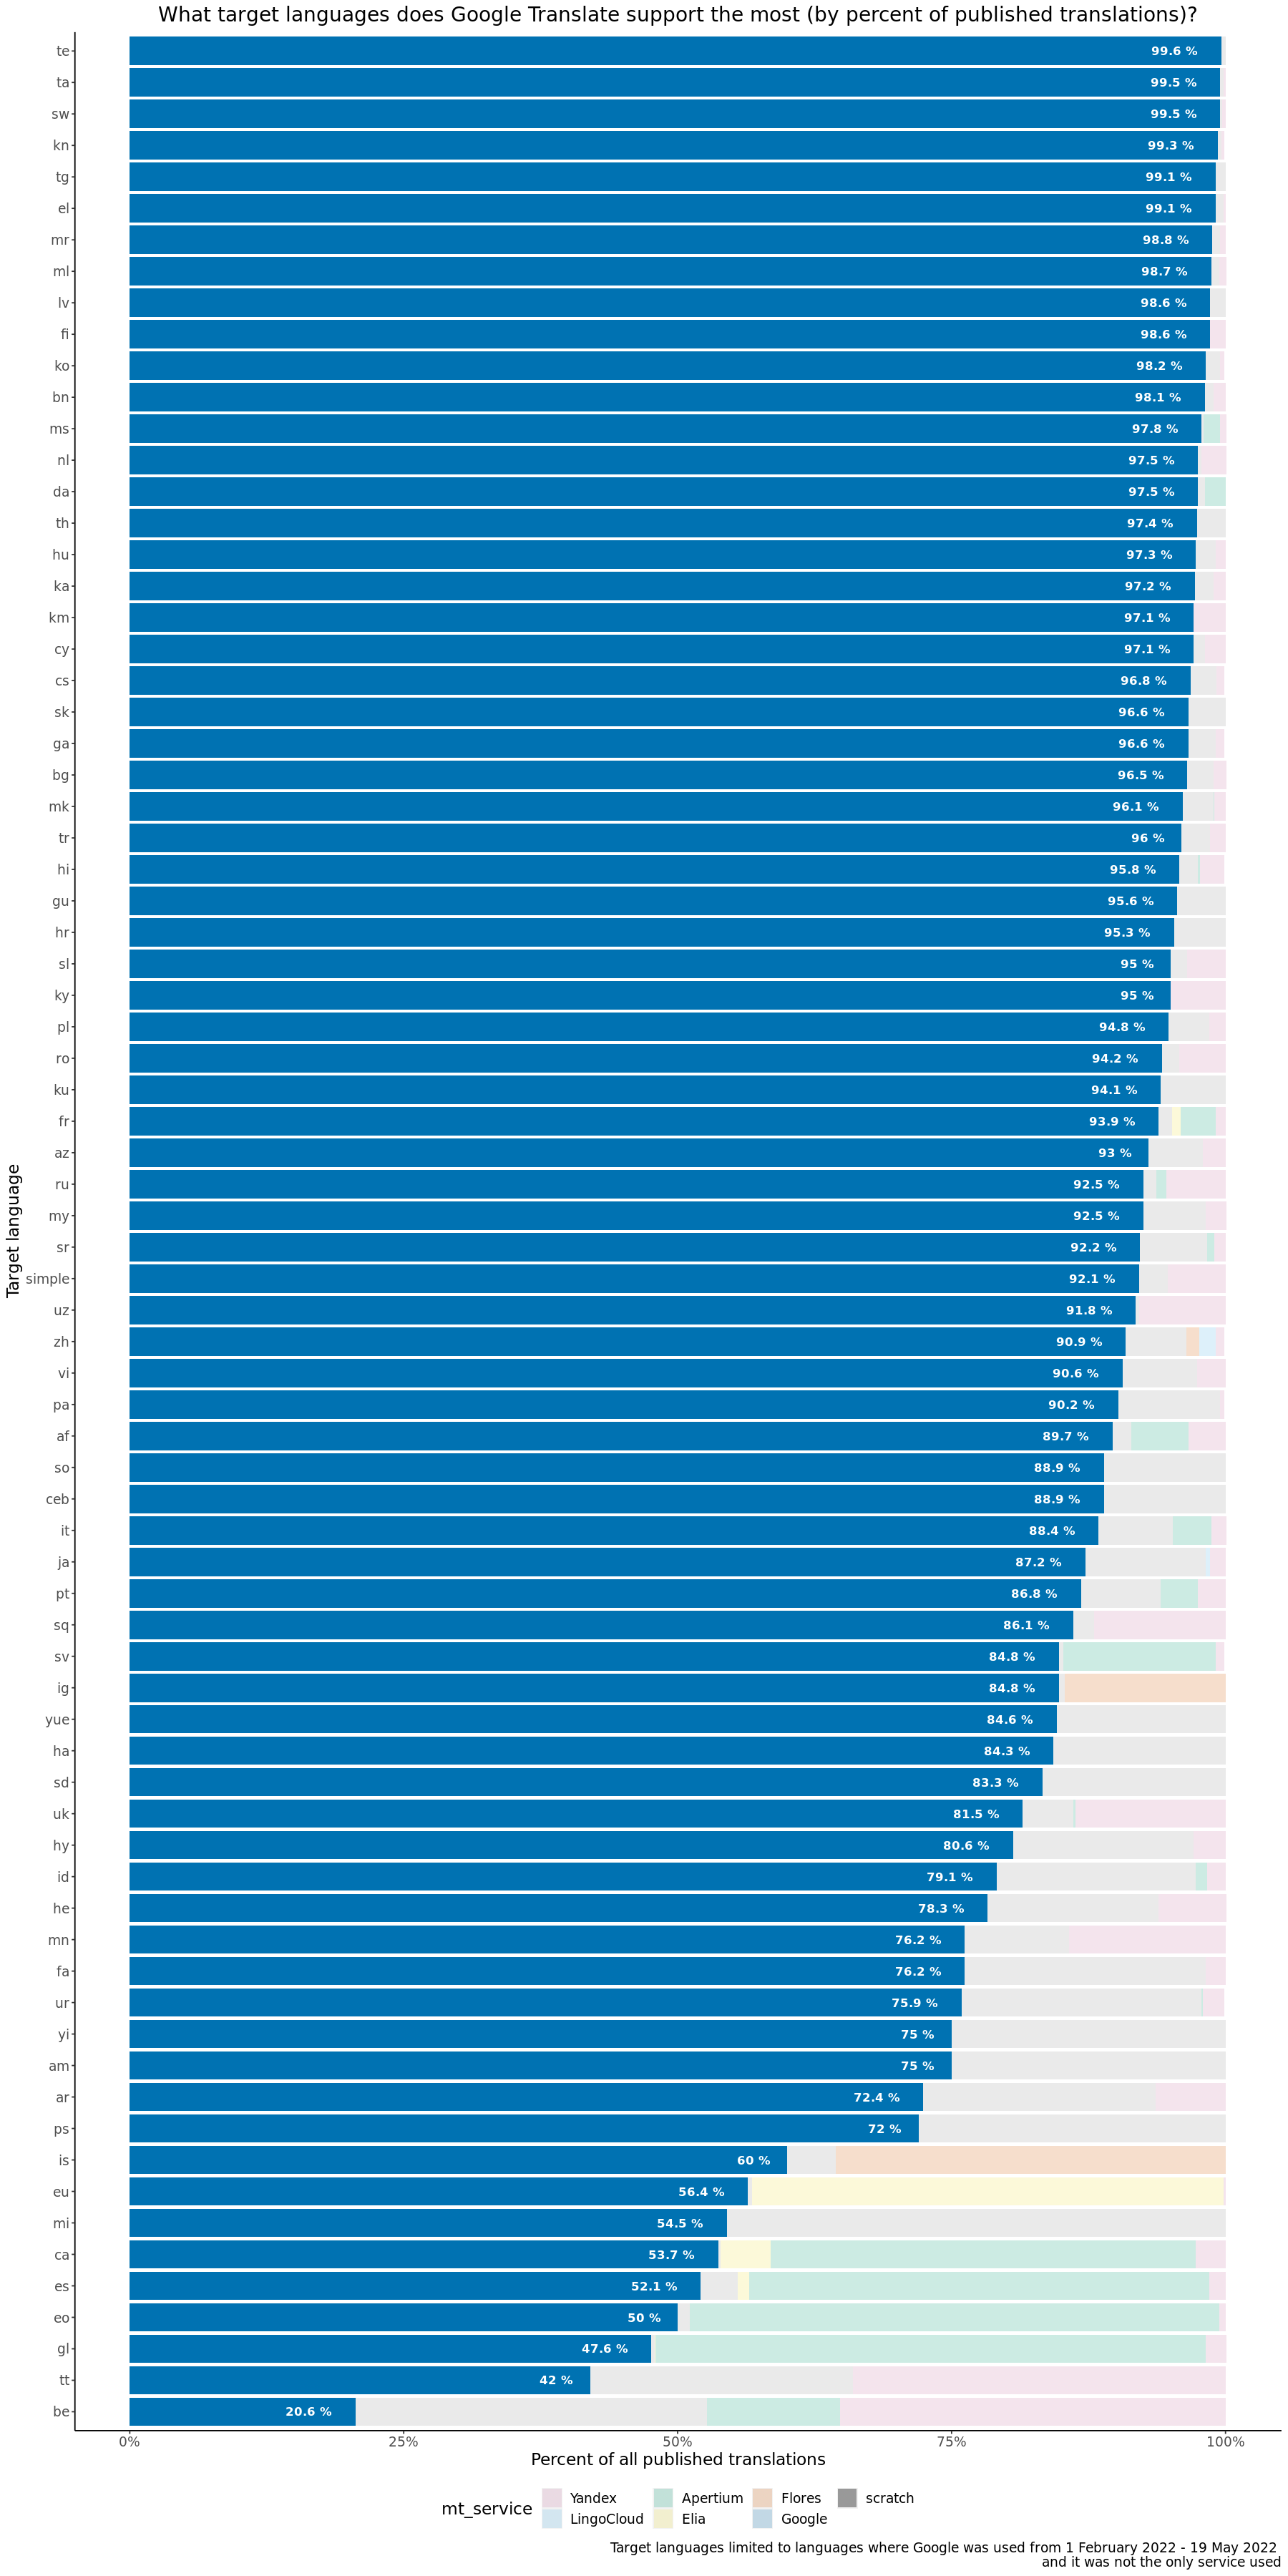

In [397]:
# Chart usage compared to other services

options(repr.plot.width = 15, repr.plot.height = 30)

p <- google_usage_compare %>%
        ggplot(aes(x = target_language, y= pct_translations, fill = mt_service, 
                 label = ifelse(mt_service == 'Google', paste(round(pct_translations * 100,2), "%"), " ")))  +
        coord_flip() +
       geom_bar(aes(alpha = mt_service == 'Google'), stat = 'identity') +
       scale_alpha_manual(values = c("TRUE" = 1, "FALSE" = 0.2), guide = F) +
        geom_text(size = 3.5, fontface = "bold", color = 'white', hjust = 1.5) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "Target language",
              y = "Percent of all published translations",
             title = "What target languages does Google Translate support the most (by percent of published translations)?",
            caption = "Target languages limited to languages where Google was used from 1 February 2022 - 19 May 2022 \n and it was not the only service used"
             ) +
         guides(fill = guide_legend(override.aes= list(alpha = c( 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1)))) +
         scale_fill_manual(values = c( "#CC79A7",  "#56B4E9","#009E73",  "#F0E442",   "#D55E00", "#0072B2", "#999999" )) +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")
            

ggsave("Figures/google_usage_compare.png", p, width = 16, height = 8, units = "in", dpi = 300)
p
    

* Google Translate was used to translate 100% of translations at many target languages including languages where it is the default or only available service. For the purpose of clarity, the above chart focuses on target languages where other MT services were available and used in addition to Google Translate.
* Excluding target languages where Google Translate is used for 100% of translations:
  * It has been the most frequently used machine translation service at Telugu (te), where it used to publish over 99.6% of all published tranlations (the other 0.5% are translations published from scratch). Google is the default service for this target language (from English and Tamil) but Yandex is also offered as well. 
  * It is used for over 50% of published translations atover 72 different target languages where other services are offered as well.
  * Belarusian (be), Galician (gl), and Tatar (tt) are the only target languages where Google Translate was used during the reviewed timeframe and used to translate under 50% of the published translations. 

# Percent machine translation content is modified

The content provided by each machine translation service can be modified by the user before publishing. We track the percent each translation is modified by the user. Per the MT abuse calculation [documentation](https://github.com/wikimedia/mediawiki-extensions-ContentTranslation/blob/master/doc/MTAbuseCalculation.md), depending on how much unmodified content is present, warning or error is shown to user. This encourages the user to edit it further. In some cases users are still able to publish, but the resulting page may get added to a tracking category of potentially unreviewed translations for the community to review. In other cases, users may not be allowed to publish.

For the purpose of this analysis, we limited the analysis to only published translations and reviewed the percent the machine translation content was modified by users into three categories: less than 10%, between 10 and 50%, and over 50%. These categories can be adjusted as needed. 

Method: Data on percent each translation is modified comes from the `translations_progress` field [^Note] in the cx_translation table (as indicated by the `human` percentage stat). 

[^Note]: The translations_progress data shows the percentage of translation completion. human indicates manual translation percentage. mt indicates machine translation percentage. Any edits to machine translation output are considered as manual edits. The percentages are calculated at section level. any indicates the total translation (any=human+mt). Content Translation does not demand full translation of the source article.

In [429]:
# modifications by percent modified

mt_modification <- mt_service_compare %>% 
    filter(mt_service != 'scratch') %>% #review only MT service modifications
    mutate(pct_human_modified = case_when(
        human_translated_percent < 0.10  ~ "less than 10%",
         (human_translated_percent >= 0.10 &  human_translated_percent < 0.51) ~ "between 10 and 50%",
         human_translated_percent >= 0.51  ~  "over 50%"),
          pct_human_modified = factor(pct_human_modified, 
                                        levels=c("over 50%", "between 10 and 50%", "less than 10%")),
          mt_service = factor(mt_service,
                             levels = c('Flores', 'OpusMT', 'Elia', 'Google', 'Yandex', 'Apertium', 'LingoCloud')))

### Overall

In [430]:
# find percent mt modified by languages where target language is available
mt_modification_byservice <- mt_modification %>%
    group_by(mt_service, pct_human_modified) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3))
    


`summarise()` regrouping output by 'mt_service' (override with `.groups` argument)



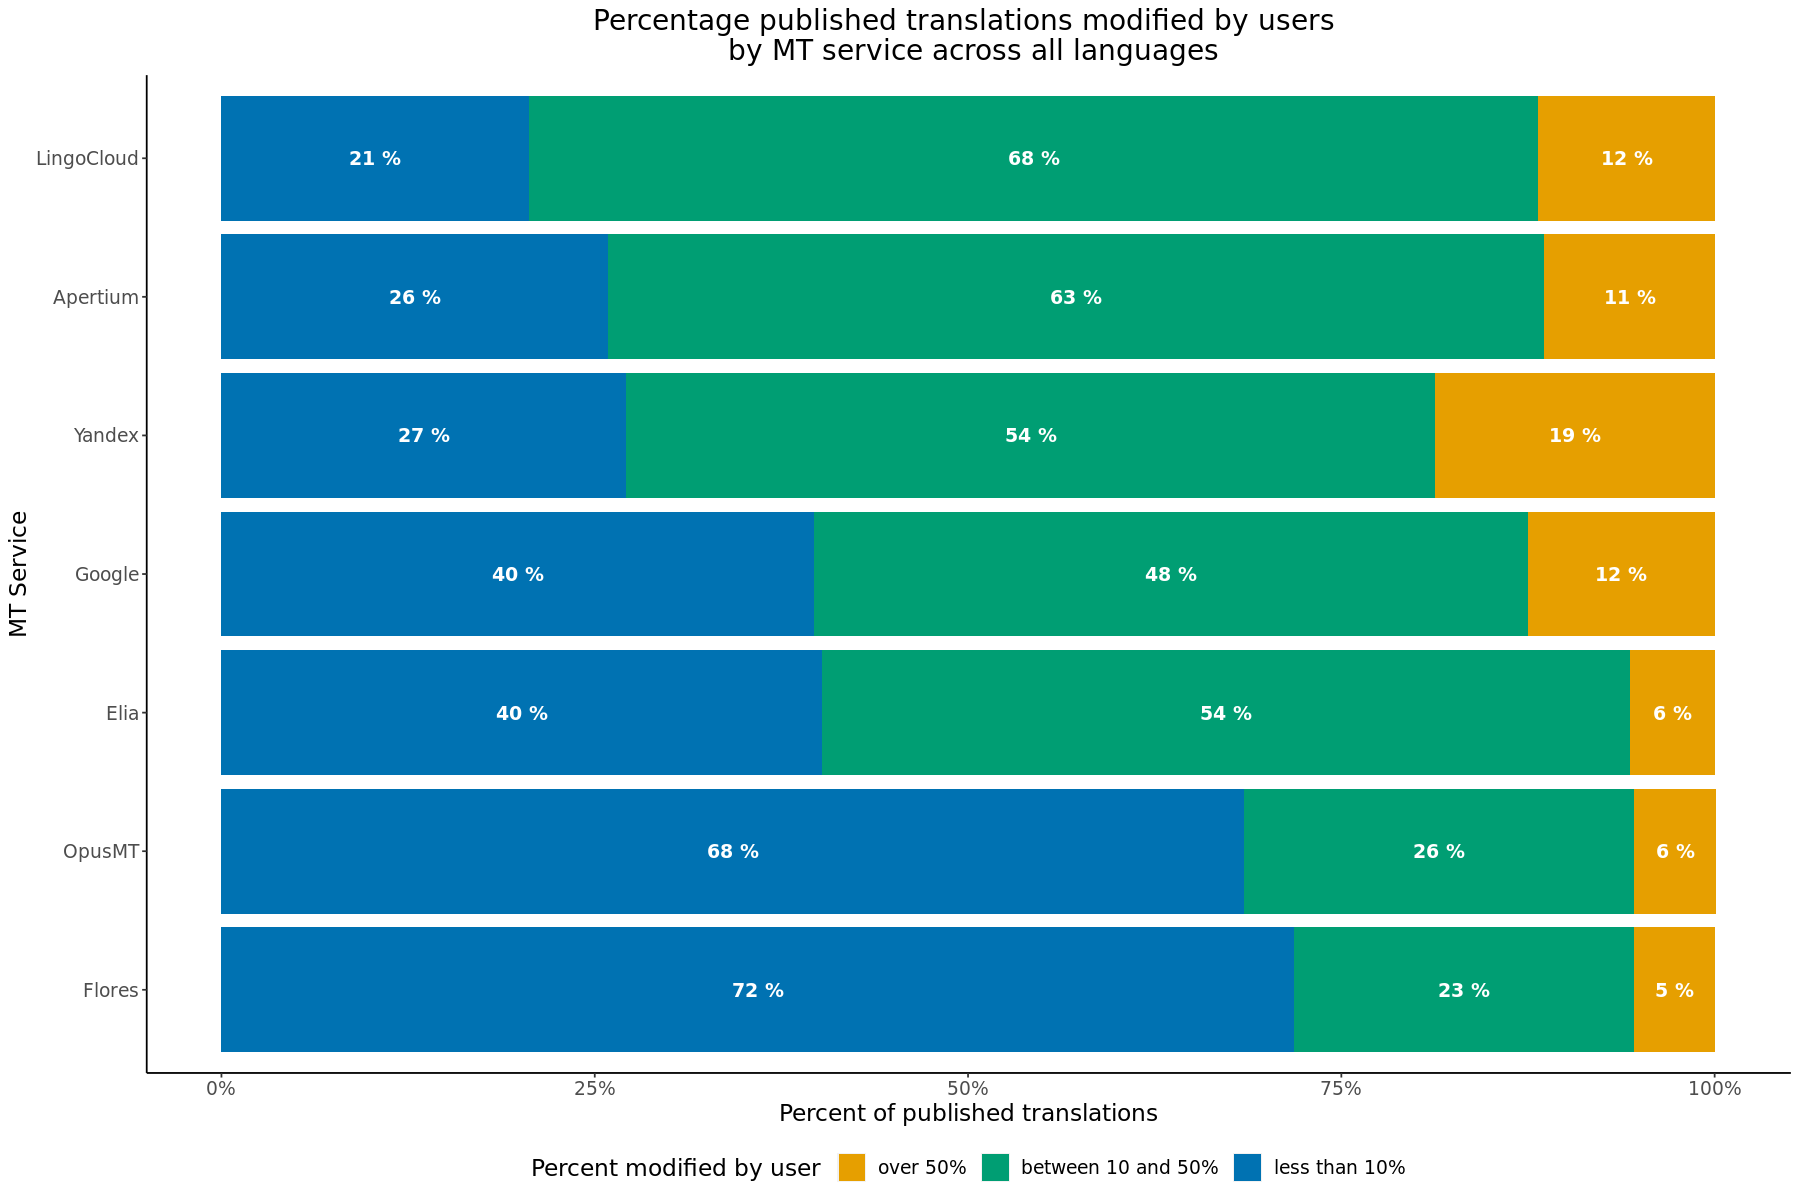

In [462]:
# Chart usage compared to other services

options(repr.plot.width = 15, repr.plot.height = 10)

p <- mt_modification_byservice  %>%
        ggplot(aes(x = mt_service, y= pct_translations, fill = pct_human_modified,
                  label = paste(round(pct_translations * 100,0), "%")) ) +
        geom_bar(stat = 'identity') +
        coord_flip() +
         geom_text(size = 4, color = 'white', fontface = 'bold', position = position_stack(vjust = 0.5)) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "MT Service",
              y = "Percent of published translations",
             title = "Percentage published translations modified by users \n by MT service across all languages"
             ) +
         scale_fill_manual(values = c("#E69F00", "#009E73", "#0072B2")) +
        guides(fill=guide_legend(title="Percent modified by user")) +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

        
 ggsave("Figures/ mt_modification_byservice .png", p, width = 16, height = 8, units = "in", dpi = 300) 
        p
            

For all translations published from 1 February 2022 through 19 May 2022:
* The majority of publications by each MT service are modified over 10% by the user with the exception of OpusMT and Flores.
* Both Flores and OpusMT have a high percentage of slightly modified translations compared to the other services. 72% of Flores translations and 68% of OpusMT translations are modified by users less than 10%.
* LingoCloud has the lowest pecent of publications modified less than 10%. Content provided by this machine translation service is typically (68% of all publications) modified between 10 and 50%. 
*  Yandex has the highest percent of translations modified over 50% (19% of publications).


Each of these machine translations services are available at differing sets and numbers of languages. For example, Flores and OpusMT are only available at a small set of language pairs while Google Translate and Yandex are offered at a large set of language pair. To determine the impact of community differences on these percent modifications, we compared percent modifications for common sets of languages, starting with a look at only Flores-supported languages.


### Flores supported languages

In [441]:
# find percent mt modified by languages at only flores supported languages
flores_mt_modification <- mt_modification %>%
    filter(target_language %in% c('ig','is', 'lg', 'oc', 'zh', 'zu'),
          source_language == 'en')  %>%
    group_by(mt_service, pct_human_modified) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3))

`summarise()` regrouping output by 'mt_service' (override with `.groups` argument)



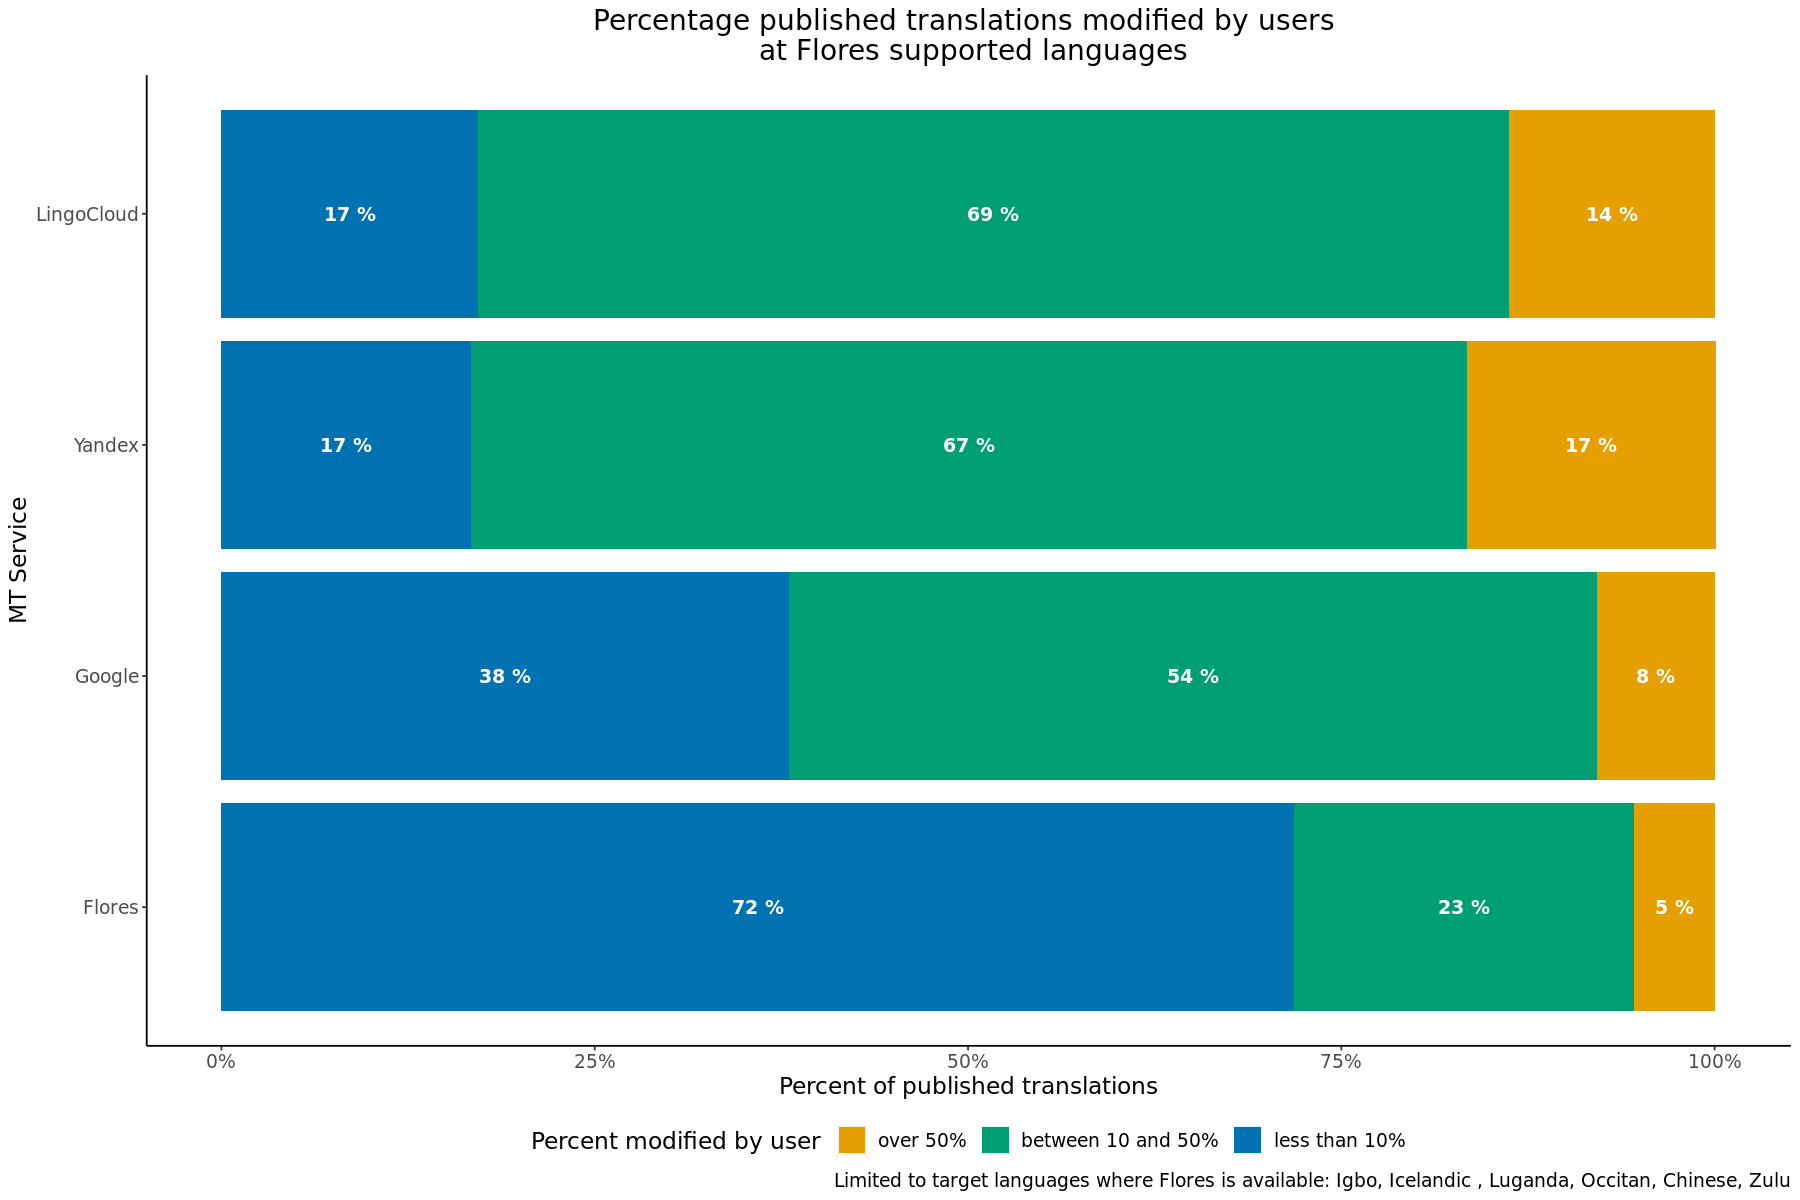

In [463]:
# Chart usage compared to other services

options(repr.plot.width = 15, repr.plot.height = 10)

p <- flores_mt_modification  %>%
        ggplot(aes(x = mt_service, y= pct_translations, fill = pct_human_modified,
                  label = paste(round(pct_translations * 100,0), "%")) ) +
        geom_bar(stat = 'identity') +
        coord_flip() +
         geom_text(size = 4, color = 'white', fontface = 'bold', position = position_stack(vjust = 0.5)) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "MT Service",
              y = "Percent of published translations",
             title = "Percentage published translations modified by users \n at Flores supported languages",
              caption = "Limited to target languages where Flores is available: Igbo, Icelandic , Luganda, Occitan, Chinese, Zulu"
             ) +
         scale_fill_manual(values = c("#E69F00", "#009E73", "#0072B2")) +
         guides(fill=guide_legend(title="Percent modified by user")) +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

        
 ggsave("Figures/ flores_mt_modification.png", p, width = 16, height = 8, units = "in", dpi = 300) 
        p

When limited to just Flores supported language pairs, we still see similar trends with LingoCloud, Yandex, and Google having a smaller percentage of slightly modified (less than 10%) translations. 

However, there results may be largely skewed by one specific wiki at instances where the majority of translations for machine translations service have been done at one langauge pair. We further reviewed usage at each Flores supported target language to determine if these observed differences are more due to the wiki or the machine translation service.

In [457]:
# find percent mt modified by languages at only flores supported languages by target
flores_mt_modification_bytarget <- mt_modification %>%
    filter(target_language %in% c('ig','is', 'lg', 'oc', 'zh', 'zu'),
          source_language == 'en')  %>%
    mutate(target_language = factor(target_language, 
                            levels = c('ig','is', 'lg', 'oc', 'zh', 'zu'),
                            labels = c('Igbo', 'Icelandic' , 'Luganda', 'Occitan', 'Chinese', 'Zulu')))  %>%
    group_by(mt_service, target_language, pct_human_modified) %>%
    summarise(num_translations = n_distinct(translation_id)) %>%
    mutate(pct_translations = round(num_translations/sum(num_translations), 3))

`summarise()` regrouping output by 'mt_service', 'target_language' (override with `.groups` argument)



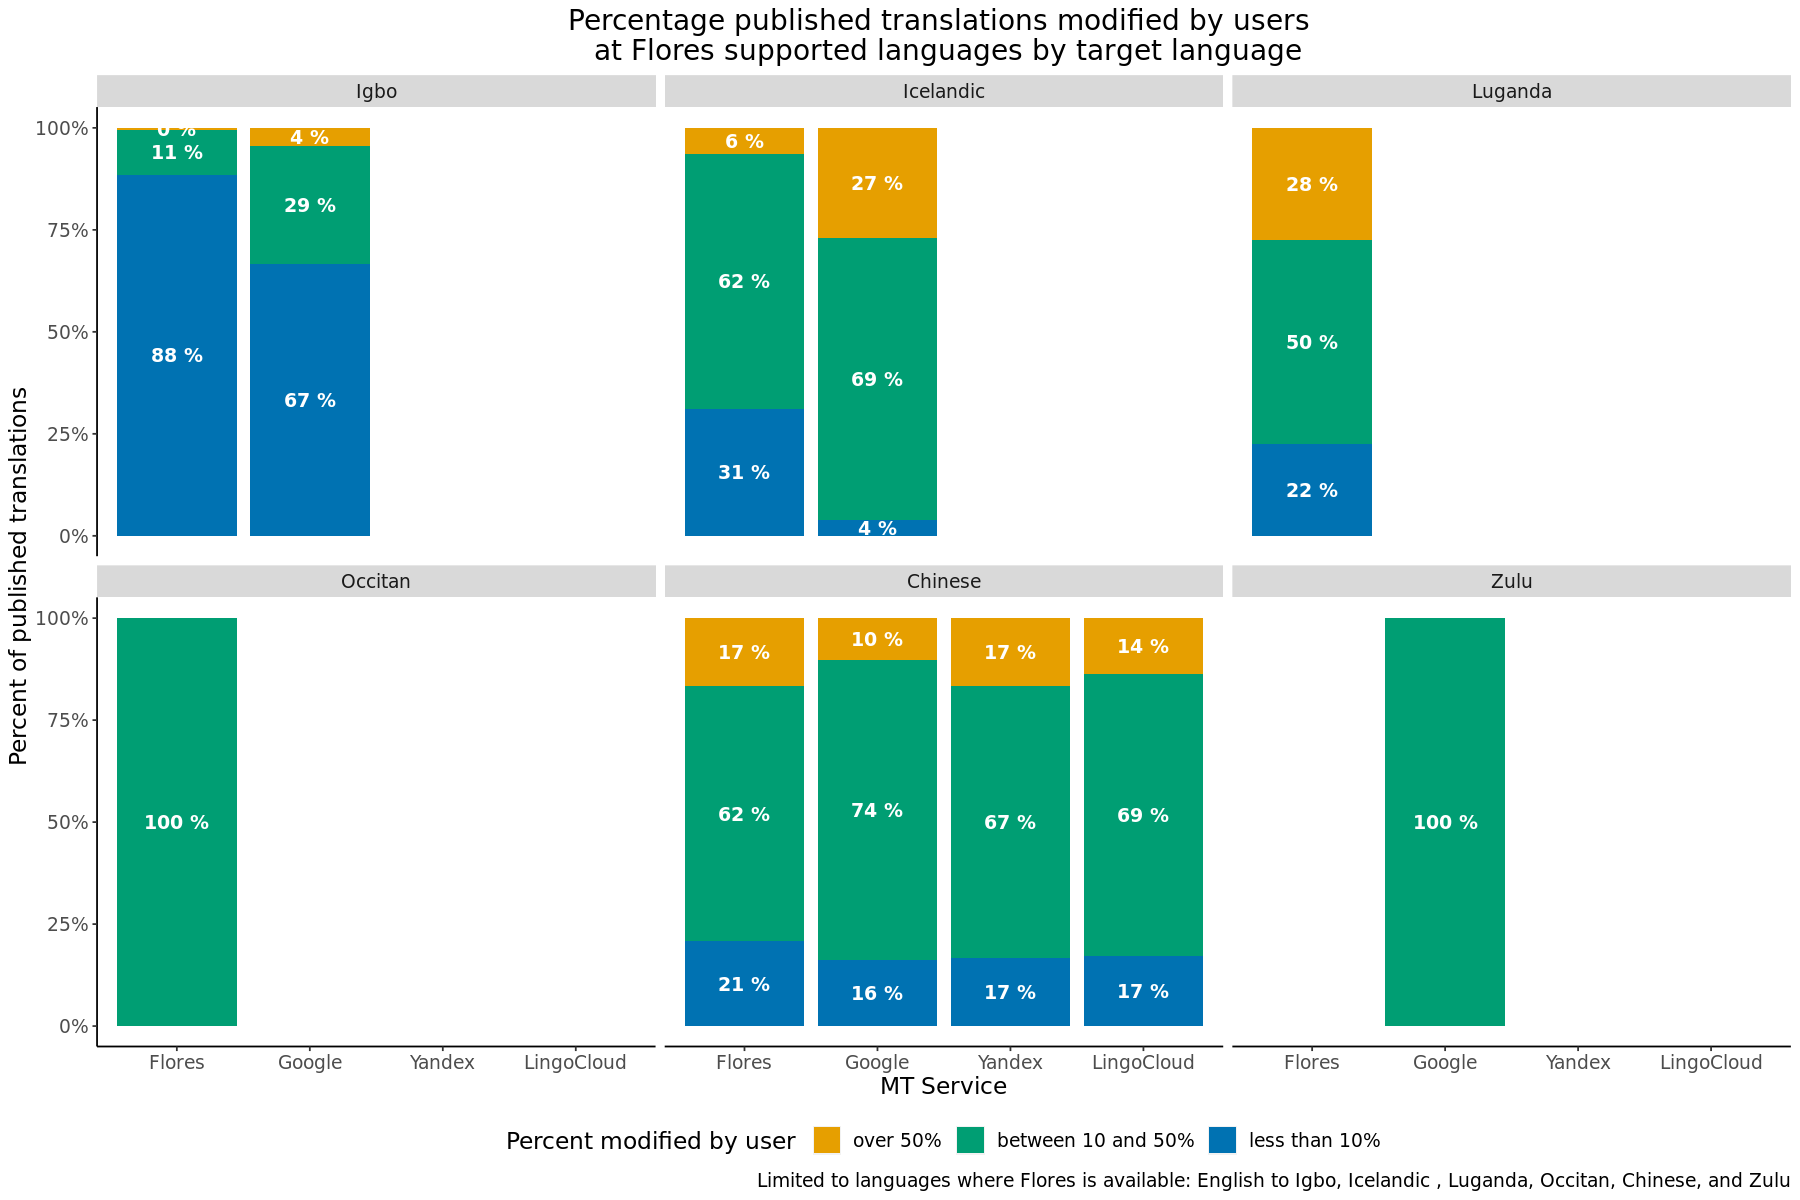

In [464]:
# Chart usage compared to other services by target

options(repr.plot.width = 15, repr.plot.height = 10)

p <- flores_mt_modification_bytarget %>%
        ggplot(aes(x =  mt_service, y= pct_translations, fill = pct_human_modified,
                  label = paste(round(pct_translations * 100,0), "%")) ) +
        geom_bar(stat = 'identity') +
         #coord_flip() +
         geom_text(size = 4, color = 'white', fontface = 'bold', position = position_stack(vjust = 0.5)) +
        facet_wrap(~target_language) +
        scale_y_continuous(labels = scales::percent) +
        labs (x = "MT Service",
              y = "Percent of published translations",
             title = "Percentage published translations modified by users \n at Flores supported languages by target language",
              caption = "Limited to languages where Flores is available: English to Igbo, Icelandic , Luganda, Occitan, Chinese, and Zulu"
             ) +
         scale_fill_manual(values = c("#E69F00", "#009E73", "#0072B2")) +
         guides(fill=guide_legend(title="Percent modified by user")) +
         theme(
            panel.grid.major = element_blank(), 
            panel.grid.minor = element_blank(),
            panel.background = element_blank(),
            #strip.background =element_rect(fill="white"),
            plot.title = element_text(hjust = 0.5),
            text = element_text(size=14),
            axis.line = element_line(colour = "black"),
            legend.position = "bottom")

        
 ggsave("Figures/flores_mt_modification_bytarget.png", p, width = 16, height = 8, units = "in", dpi = 300) 
        p

Based on a breakdown by target language, it appears that the differences in modification rates are impacted more by the target language than the machine translation service. For example, Igbo has high percentage of slightly modified (less than 10%) translations for both Flores and Google translations and the majority of Chinese translations are modified between 10 and 50% across all available machine translation services.

Additionally, the percent each machine translation service is typically modified can vary across target languages. At other target languages where available, Flores translations are modified between 10 and 50%. 

Icelandic shows some slight differences in modification rates depending on the Machine Translation service used. While the majority of translations at this target language are modified between 10 and 50%, there are fewer Google translations that are modified less than 10% compared to Flores. 4% of Icelandic translations made using Google Translation are only slightly modified by users compared to 31% of Flores translations. Note: There were a small number of English to Icelandic translations recorded in the reviewed timeframe (16 Flores translations and 26 Google translations). Additional data as more translations are published will help further confirm if any of these observed trends continue.


# Potential areas for future investigation

* Percent of articles that are created with each MT service and deleted
* MT service usage by topic 
* Draft vs published comparison
* MT service usage by number of unique translators